# use Combat adj

In [1]:
#https://github.com/zhangyuqing/ComBat-seq
library(sva)
library(dplyr)

Loading required package: mgcv

Warning message:
“package ‘mgcv’ was built under R version 4.0.5”
Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel


Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# ##############################################################################
# Get Data
load('../data/pub/ICB/merged_clean_otumetatax_fiveICB_cohort.RData')

feat.all <- feat.ab.red
meta <- meta.crc

stopifnot(all(meta$Sample_ID %in% colnames(feat.all)))

studies <- meta %>% pull(Study) %>% unique

feat.all <- feat.all[,meta$Sample_ID]
dim(feat.all)
#fn.pval <- paste0('../files/', tag, '/p_adj.tsv')
#if (!file.exists(fn.pval)){
#  stop("Please run the marker analysis script first. Exiting...\n")
#}
#p.vals.adj <- read.table(fn.pval, sep='\t', check.names = FALSE)
meta$Group= ifelse(meta$age> 60, 'old','young')

[1] 1263  782

In [3]:
table(meta$Group)


  old young 
  511   271 

In [5]:
summary(meta$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.50   58.00   64.00   64.08   72.00   92.50 

In [4]:
feat.all[1:4,1:4]

,SRR15372978,SRR15372967,SRR15372934,SRR15372933
s__ Enterobacter sp. .[ref_mOTU_v3_00077],0,0,1,0
s__Klebsiella aerogenes.[ref_mOTU_v3_00084],0,0,0,0
s__Klebsiella pneumoniae.[ref_mOTU_v3_00085],0,0,0,0
s__Klebsiella michiganensis/oxytoca .[ref_mOTU_v3_00086],0,50,0,0


In [5]:
taxonomy= tax
rownames(taxonomy)= paste0(taxonomy$Species, '.[', rownames(taxonomy), ']')
head(taxonomy)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
s__Leptospira alexanderi.[ref_mOTU_v3_00001],k__Bacteria,p__Spirochaetes,c__Spirochaetia,o__Leptospirales,f__Leptospiraceae,g__Leptospira,s__Leptospira alexanderi
s__Leptospira weilii .[ref_mOTU_v3_00002],k__Bacteria,p__Spirochaetes,c__Spirochaetia,o__Leptospirales,f__Leptospiraceae,g__Leptospira,s__Leptospira weilii
s__Chryseobacterium sp. .[ref_mOTU_v3_00004],k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,g__Chryseobacterium,s__Chryseobacterium sp.
s__Chryseobacterium gallinarum .[ref_mOTU_v3_00005],k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,g__Chryseobacterium,s__Chryseobacterium gallinarum
s__Chryseobacterium indologenes .[ref_mOTU_v3_00006],k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,g__Chryseobacterium,s__Chryseobacterium indologenes
s__Chryseobacterium artocarpi/ureilyticum.[ref_mOTU_v3_00007],k__Bacteria,p__Bacteroidetes,c__Flavobacteriia,o__Flavobacteriales,f__Flavobacteriaceae,g__Chryseobacterium,s__Chryseobacterium artocarpi/ureilyticum


In [6]:
rownames(meta)= meta$motuID
head(meta, n=2)

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.10717,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.35108,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young


In [6]:
#install.packages("table1")
library(table1) 
library(boot)

pvalue <- function(x, ...) {
  # Construct vectors of data y, and groups (strata) g
  y <- unlist(x)
  g <- factor(rep(1:length(x), times=sapply(x, length)))
  if (is.numeric(y)) {
    # For numeric variables, perform a standard 2-sample t-test
    p <- t.test(y ~ g)$p.value
  } else {
    # For categorical variables, perform a chi-squared test of independence
    p <- chisq.test(table(y, g))$p.value
  }
  # Format the p-value, using an HTML entity for the less-than sign.
  # The initial empty string places the output on the line below the variable label.
  c("", sub("<", "&lt;", format.pval(p, digits=3, eps=0.001)))
}
otable= table1(~ gender + response_bin + bmi_bin + country + Study+disease+atb| Group, data=meta,overall=F, extra.col=list(`P-value`=pvalue))



Attaching package: ‘table1’


The following objects are masked from ‘package:base’:

    units, units<-


Warning message in chisq.test(table(y, g)):
“Chi-squared approximation may be incorrect”


In [57]:
write.csv(otable, file= paste0('1.VarianceAndConfunder/clin_baseline/metaAll_baseline_age_bin60_atb.csv'))

In [7]:
library(sva)
#otu_combat = ComBat_seq(cb_otu, batch=cb_meta$Study, group=NULL)
covar_mat= meta[, c('gender','bmi_bin')]
#otu_combat = ComBat_seq(cb_otu, batch=cb_meta$Study, group=NULL, covar_mod=covar_mat)
feat.all_adjusted <- ComBat_seq(feat.all, batch=meta$Study, group=NULL, covar_mod=covar_mat)
#otu_combat <- ComBat_seq(feat.all, batch=meta$Study, group=cb_meta$response_bin)
feat.all_adjusted[1:4,1:4]

Found 5 batches
Using null model in ComBat-seq.
Adjusting for 4 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


,SRR15372978,SRR15372967,SRR15372934,SRR15372933
s__ Enterobacter sp. .[ref_mOTU_v3_00077],0,0,1,0
s__Klebsiella aerogenes.[ref_mOTU_v3_00084],0,0,0,0
s__Klebsiella pneumoniae.[ref_mOTU_v3_00085],0,0,0,0
s__Klebsiella michiganensis/oxytoca .[ref_mOTU_v3_00086],0,8,0,0


In [8]:
save(feat.all_adjusted, taxonomy, meta, file= '3.dif_micro/Combat_microeco/feat_all_adj_meta_tax.RData')

In [1]:
load('3.dif_micro/Combat_microeco/feat_all_adj_meta_tax.RData')

In [2]:
#####
library(dplyr)
library(tidyverse)
library(phyloseq)
library(microeco)
library(magrittr)
#####***create microtable obj
#####
dataset <- microtable$new(sample_table = meta, otu_table = feat.all_adjusted, tax_table = taxonomy)
dataset

#dataset$tax_table %<>% base::subset(Kingdom == "d__Bacteria")
#save(dataset,file='16s.Rdat')
# 移除tax_table中包含taxa名字的行，无论分类等级（taxonomic ranks），不区分大小写字母。简言之，taxa = c("mitochondria", "chloroplast")定义了删除包含mitochondria和chloroplast的行。
dataset$filter_pollution(taxa = c("mitochondria", "chloroplast"))
print(dataset)
#
dataset$tidy_dataset()
print(dataset)
dataset$sample_sums() %>% range
####
####***pseq obj
####
ps = phyloseq(tax_table(as.matrix(taxonomy)), 
              sample_data(meta), 
              otu_table(feat.all_adjusted, taxa_are_rows = TRUE))
ps
####
####*** cal abundance
####
dataset$cal_abund()
# return dataset$taxa_abund
class(dataset$taxa_abund)
# show part of the relative abundance at Phylum level
dataset$taxa_abund$Phylum[1:5, 1:5]
####
####***cal alpha
####
# 若要计算Faith's phylogenetic diversity，设置PD = TRUE，计算速度会较慢
dataset$cal_alphadiv(PD = FALSE)
# return dataset$alpha_diversity
class(dataset$alpha_diversity)
####
####***cal beta
# If you do not want to calculate unifrac metrics, use unifrac = FALSE
# 需要GUniFrac package
#install.packages("GUniFrac")
dataset$cal_betadiv(unifrac = F)
# return dataset$beta_diversity
class(dataset$beta_diversity)
####***
####***Diversity-based class
#####alpha
t1 <- trans_alpha$new(dataset = dataset, group = "Group")
# return t1$alpha_stat
t1$data_stat[1:5, ]
#*for two groups
t1$cal_diff(method = "KW")
# return t1$res_alpha_diff
t1$res_diff
######
######*****beta
######
# we first create an trans_beta object
# measure parameter can invoke the distance matrix in dataset$beta_diversity
t2 <- trans_beta$new(dataset = dataset, group = "Group", measure = "bray")
# use PCoA as an example, PCA or NMDS is also available
t2$cal_ordination(ordination = "PCoA")
# t1$res_ordination is the ordination result list
class(t2$res_ordination)
# calculate and plot sample distances within groups
t2$cal_group_distance()
# manova for all groups when manova_all = TRUE
t2$cal_manova(manova_all = TRUE)
t2$res_manova
#####
#####
# t1$res_diff is the differential test result
# t1$res_abund is the group abundance
t3 <- trans_diff$new(dataset = dataset, method = "lefse", group = "Group", alpha = 0.5, lefse_subgroup = NULL)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




microtable-class object:
sample_table have 782 rows and 32 columns
otu_table have 1263 rows and 782 columns
tax_table have 33569 rows and 7 columns

Total 0 taxa are removed from tax_table ...



microtable-class object:
sample_table have 782 rows and 32 columns
otu_table have 1263 rows and 782 columns
tax_table have 33569 rows and 7 columns
microtable-class object:
sample_table have 782 rows and 32 columns
otu_table have 1263 rows and 782 columns
tax_table have 1263 rows and 7 columns


[1]        312 1669002451

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1263 taxa and 782 samples ]
sample_data() Sample Data:       [ 782 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 1263 taxa by 7 taxonomic ranks ]

The result is stored in object$taxa_abund ...



[1] "list"

,SRR15372978,SRR15372967,SRR15372934,SRR15372933,SRR15372932
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Bacteria|p__Firmicutes,0.9640149372,0.664342925,0.668348955,0.3105975898,0.832970034
k__Bacteria|p__Bacteroidetes,0.0002263211,0.306882231,0.271809661,0.5154677600,0.070541272
k__Bacteria|p__Proteobacteria,0.0198031006,0.022100267,0.047344388,0.0377686669,0.002888883
k__Bacteria|p__Verrucomicrobia,0.0000000000,0.000000000,0.008050949,0.1126848056,0.008535336
k__Bacteria|p__Actinobacteria,0.0159556411,0.006674577,0.003364576,0.0004969561,0.002494944


The result is stored in object$alpha_diversity ...



[1] "data.frame"

The result is stored in object$beta_diversity ...



[1] "list"

The transformed diversity data is stored in object$data_alpha ...

The group statistics are stored in object$data_stat ...



,Group,Measure,N,Mean,SD,SE
,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,old,Observed,511,235.6536204,82.1251041,3.63300071
2,old,Chao1,511,394.5495701,158.4954837,7.01142740
3,old,ACE,511,327.1067122,116.5375796,5.15531900
4,old,Shannon,511,3.1432678,1.0612330,0.04694618
5,old,Simpson,511,0.8238912,0.2299305,0.01017153


The result is stored in object$res_diff ...



Comparison,Measure,Test_method,Group,P.unadj,P.adj,Significance
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
young - old,Observed,Kruskal-Wallis Rank Sum Test,young,0.9990710,0.999071,ns
young - old,Chao1,Kruskal-Wallis Rank Sum Test,old,0.9065171,0.999071,ns
young - old,ACE,Kruskal-Wallis Rank Sum Test,old,0.8709045,0.999071,ns
young - old,Shannon,Kruskal-Wallis Rank Sum Test,old,0.9441720,0.999071,ns
young - old,Simpson,Kruskal-Wallis Rank Sum Test,old,0.7259870,0.999071,ns
young - old,InvSimpson,Kruskal-Wallis Rank Sum Test,old,0.7259870,0.999071,ns
young - old,Fisher,Kruskal-Wallis Rank Sum Test,old,0.5628046,0.999071,ns


The ordination result is stored in object$res_ordination ...



[1] "list"

The result is stored in object$res_group_distance ...

The result is stored in object$res_manova ...



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Group,1,0.8312465,0.002601958,2.034822,0.001
Residual,780,318.6383026,0.997398042,NA,NA
Total,781,319.4695491,1.000000000,NA,NA


Start Kruskal-Wallis rank sum test for Group ...

412 taxa found significant ...

After P value adjustment, 216 taxa found significant ...

Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.default(x, grouping, ...):
“variables are collinear”
Warning message in lda.d

In [5]:
dim(dataset$taxa_abund$Species)

[1] 485 782

In [6]:
write.csv(dataset$taxa_abund$Species, '3.dif_micro/Combat_microeco/dataset_microeco_species_matrix.csv')

In [7]:
write.csv(meta, file= '3.dif_micro/Combat_microeco/dataset_microeco_meta_clin.csv')

In [79]:
meta= read.csv('3.dif_micro/Combat_microeco/dataset_microeco_meta_clin.csv',header=T, row.names = 1)

In [80]:
table(meta$Study,meta$disease);dim(meta)

                               
                                melanoma NSCLC RCC
  Derosa_etal_NM_2022                  0   338   0
  Lee_etal_NM_2022                   162     0   0
  McCulloch_etal_NM_2022              63     0   0
  Routy_etal_Science_2017.NSCLC        0   118   0
  Routy_etal_Science_2017.RCC          0     0 101

[1] 782  32

In [82]:
library(ggpubr)
library(dplyr)
library(tidyr)

aaa=meta
aaa$species=aaa$Study
penguins_freq <- aaa %>%
  group_by(species) %>%
  summarise(frequency = length(species))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [83]:
penguins_freq

species,frequency
<chr>,<int>
Derosa_etal_NM_2022,338
Lee_etal_NM_2022,162
McCulloch_etal_NM_2022,63
Routy_etal_Science_2017.NSCLC,118
Routy_etal_Science_2017.RCC,101


In [85]:
library(ggpubr)
library(dplyr)
library(tidyr)

aaa=meta
aaa$species=aaa$Study
penguins_freq <- aaa %>%
  group_by(species) %>%
  summarise(frequency = length(species))

labs <- paste0(penguins_freq$species, " (", round((penguins_freq$frequency/sum(penguins_freq$frequency))*100, digits = 0), "%)")
pdf('3.dif_micro/Combat_microeco/newanalysis/five_cohort_distribution.pdf',width = 10,height = 10)
ggdonutchart(penguins_freq,
             "frequency",
             label = labs,
             fill = "species",
             palette = "jco",
             lab.pos = "in",
             title = "Frequency of cohort")
dev.off()

png 
  2

In [41]:
p1=t1$plot_alpha(pair_compare = F, measure = "Shannon", shape = "Group")+
theme(legend.position = "right",
              #legend.justification = c(0,1),
              #legend.title = element_blank(),
              legend.text = element_text(size=10),
              legend.title = element_text(size=10),
              aspect.ratio = 1.2,
              plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
              axis.title.y = element_text(size=10,colour="black"),
              axis.title.x = element_text(size=10,colour="black"),
              #axis.title.x = element_blank(),
              axis.text = element_text(size=10,colour="black",angle=0),
              axis.text.x = element_text(size=10,colour="black",angle=0,hjust=0.5,vjust=0.5),
              #axis.text.x = element_blank(),
              plot.title = element_text(size=10,face="bold",hjust = 0.5),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=0.5),
              axis.line = element_line(colour = "black"),
              axis.ticks.length=unit(.1, "cm"),
              axis.ticks = element_line(colour = "black", size = 0.5)
)

p2=t2$plot_ordination(plot_color = "Study", plot_shape = "Study", plot_type = c("point", "ellipse"))+
theme(legend.position = "right",
              #legend.justification = c(0,1),
              #legend.title = element_blank(),
              legend.text = element_text(size=10),
              legend.title = element_text(size=10),
              aspect.ratio = 1,
              plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
              axis.title.y = element_text(size=10,colour="black"),
              axis.title.x = element_text(size=10,colour="black"),
              #axis.title.x = element_blank(),
              axis.text = element_text(size=10,colour="black",angle=0),
              axis.text.x = element_text(size=10,colour="black",angle=0,hjust=0.5,vjust=0.5),
              #axis.text.x = element_blank(),
              plot.title = element_text(size=10,face="bold",hjust = 0.5),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=0.5),
              axis.line = element_line(colour = "black"),
              axis.ticks.length=unit(.1, "cm"),
              axis.ticks = element_line(colour = "black", size = 0.5)
)

p2.1=t2$plot_ordination(plot_color = "Group", plot_shape = "Group", plot_type = c("point", "ellipse"),
                       color_values=c("young"="#74add1","old"="#f46d43"))+
theme(legend.position = "right",
              #legend.justification = c(0,1),
              #legend.title = element_blank(),
              legend.text = element_text(size=10),
              legend.title = element_text(size=10),
              aspect.ratio = 1.2,
              plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
              axis.title.y = element_text(size=10,colour="black"),
              axis.title.x = element_text(size=10,colour="black"),
              #axis.title.x = element_blank(),
              axis.text = element_text(size=10,colour="black",angle=0),
              axis.text.x = element_text(size=10,colour="black",angle=0,hjust=0.5,vjust=0.5),
              #axis.text.x = element_blank(),
              plot.title = element_text(size=10,face="bold",hjust = 0.5),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=0.5),
              axis.line = element_line(colour = "black"),
              axis.ticks.length=unit(.1, "cm"),
              axis.ticks = element_line(colour = "black", size = 0.5)
)
p3=t2$plot_group_distance(distance_pair_stat = TRUE)+
theme(legend.position = "right",
              #legend.justification = c(0,1),
              #legend.title = element_blank(),
              legend.text = element_text(size=10),
              legend.title = element_text(size=10),
              aspect.ratio = 1.2,
              plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
              axis.title.y = element_text(size=10,colour="black"),
              axis.title.x = element_text(size=10,colour="black"),
              #axis.title.x = element_blank(),
              axis.text = element_text(size=10,colour="black",angle=0),
              axis.text.x = element_text(size=10,colour="black",angle=0,hjust=0.5,vjust=0.5),
              #axis.text.x = element_blank(),
              plot.title = element_text(size=10,face="bold",hjust = 0.5),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=0.5),
              axis.line = element_line(colour = "black"),
              axis.ticks.length=unit(.1, "cm"),
              axis.ticks = element_line(colour = "black", size = 0.5)
)
# we show 30 taxa with the highest LDA
p4=t3$plot_diff_bar(use_number = 1:30, width = 0.8#, group_order = c("old", "young")
                )

p5=t3$plot_diff_bar(threshold = 2)


The ordered groups are old young ...



In [16]:
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/"))
if(!dir.exists(outDir)) dir.create(outDir,recursive=TRUE)

In [42]:
pdf(paste0(outDir, 'combat_after_dis_lefse_allsig.pdf'),width = 7,height = 20)
cowplot::plot_grid(p5,nrow = 1)
dev.off()

png 
  2

In [43]:
pdf(paste0(outDir, 'combat_after_dis_p1_alpha.pdf'),width = 4,height = 5)
cowplot::plot_grid(p1,ncol=1)
dev.off()
#
pdf(paste0(outDir, 'combat_after_dis_p1_pcoa_study.pdf'),width = 7,height = 7)
cowplot::plot_grid(p2,ncol=1)
dev.off()
#
pdf(paste0(outDir, 'combat_after_dis_p1_pcoa_ageGroup.pdf'),width = 5,height = 5)
cowplot::plot_grid(p2.1,ncol=1)
dev.off()
#
pdf(paste0(outDir, 'combat_after_dis_p1_boxplot_braydis.pdf'),width = 5,height = 6)
cowplot::plot_grid(p3,ncol=1)
dev.off()
#
pdf(paste0(outDir, 'combat_after_dis_p1_barplot_diflefse_defaulttop.pdf'),width = 5,height = 6)
cowplot::plot_grid(p4,ncol=1)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

In [45]:
library(patchwork)

pdf(paste0(outDir, 'combat_after_dis.pdf'),width = 25,height = 14)
p1+p2+p2.1+p3+p4
dev.off()


png 
  2

In [83]:
lefdis= t3$res_diff
head(lefdis,n=3)
#
library(stringr)
tax=str_split_fixed(lefdis$Taxa,'\\|',7)
rownames(tax)=rownames(lefdis)
tax=data.frame(tax)
names(tax)=c('Kingdom','Phylum','Class','Order','Family','Genus','Species')
tax$Species=sapply(stringr::str_split(tax$Species, "\\["), `[`, 1)
head(tax,n=3)
#
lefdis= cbind(tax, lefdis) 
head(lefdis,n=3)

write.csv(lefdis, file= '3.dif_micro/Combat_microeco/lefdis_all.csv')

,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales,LEfSe,young,4.094120,0.1006804,0.4436028,ns
k__Bacteria|p__Firmicutes|c__Clostridia,old - young,k__Bacteria|p__Firmicutes|c__Clostridia,LEfSe,young,4.093417,0.1027672,0.4442405,ns
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae,LEfSe,young,4.082154,0.0108056,0.1506168,ns


,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,,,
k__Bacteria|p__Firmicutes|c__Clostridia,k__Bacteria,p__Firmicutes,c__Clostridia,,,,
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,,


,Kingdom,Phylum,Class,Order,Family,Genus,Species,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,,,,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales,LEfSe,young,4.094120,0.1006804,0.4436028,ns
k__Bacteria|p__Firmicutes|c__Clostridia,k__Bacteria,p__Firmicutes,c__Clostridia,,,,,old - young,k__Bacteria|p__Firmicutes|c__Clostridia,LEfSe,young,4.093417,0.1027672,0.4442405,ns
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,,,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae,LEfSe,young,4.082154,0.0108056,0.1506168,ns


In [19]:
lefdis=read.csv('3.dif_micro/Combat_microeco/lefdis_all.csv',header=T,row.names = 1)

In [20]:
lefdis_Species= lefdis[grepl('s__', lefdis$Species),]
head(lefdis_Species,n=3)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,old - young,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli,LEfSe,old,3.654566,0.02552426,0.2296699,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides uniformis,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,LEfSe,old,3.640768,0.01427693,0.1738576,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella copri,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella,s__Prevotella copri,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella copri,LEfSe,old,3.597704,0.13083661,0.4654240,ns


In [23]:
dtm= subset(lefdis_Species, LDA >= 2)
dtm$LDAscore= ifelse(dtm$Group == 'old', dtm$LDA, paste0('-',dtm$LDA)) %>% as.numeric

dtm$colour <- ifelse(dtm$LDAscore < 0, "firebrick1",
                       "steelblue")
dtm$hjust <- ifelse(dtm$LDAscore > 0, 1.3, -0.3)
dtm= dtm[order(dtm$LDAscore, decreasing = F),]
#dtm$name= paste(dtm$Genus, dtm$Species, sep='__')
#dtm$name= factor(dtm$name, levels= dtm$name)
dtm$name= ifelse(duplicated(dtm$Species), paste(dtm$Genus, dtm$Species, sep='__'), dtm$Species)
dtm$name= factor(dtm$name, levels= dtm$name)

In [24]:
head(dtm)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance,LDAscore,colour,hjust,name
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcus|s__Ruminococcus bromii,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__Ruminococcus bromii,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcus|s__Ruminococcus bromii,LEfSe,young,3.335379,1.092908e-01,0.448275573,ns,-3.335379,firebrick1,-0.3,s__Ruminococcus bromii
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium longum,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium longum,old - young,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium longum,LEfSe,young,3.069509,1.873951e-03,0.075709517,ns,-3.069509,firebrick1,-0.3,s__Bifidobacterium longum
k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium adolescentis,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,s__Bifidobacterium adolescentis,old - young,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium adolescentis,LEfSe,young,2.943750,5.842927e-06,0.003990719,**,-2.943750,firebrick1,-0.3,s__Bifidobacterium adolescentis
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__Blautia massiliensis,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Blautia,s__Blautia massiliensis,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__Blautia massiliensis,LEfSe,young,2.913242,3.519099e-03,0.075709517,ns,-2.913242,firebrick1,-0.3,s__Blautia massiliensis
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Anaerostipes|s__Anaerostipes hadrus,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Lachnospiraceae,g__Anaerostipes,s__Anaerostipes hadrus,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Anaerostipes|s__Anaerostipes hadrus,LEfSe,young,2.888299,6.688308e-02,0.365449160,ns,-2.888299,firebrick1,-0.3,s__Anaerostipes hadrus
k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus|s__Lactococcus lactis,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Lactococcus,s__Lactococcus lactis,old - young,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Lactococcus|s__Lactococcus lactis,LEfSe,young,2.828919,2.771808e-02,0.236643067,ns,-2.828919,firebrick1,-0.3,s__Lactococcus lactis


In [25]:
summary(dtm$LDAscore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.335   2.027   2.368   1.337   2.725   3.655 

In [26]:
g1=ggplot(dtm, aes(name, LDAscore, label = name#,
                #hjust = hjust
               )) + #geom_text(aes(y = 0,colour = colour)) + 
             geom_bar(stat = "identity", aes(fill = Group))+ coord_flip()+
  labs(x = "", y = "LDA score") +
  scale_fill_manual(values=c("young"="#74add1","old"="#f46d43"))+
  #scale_x_discrete(breaks = NULL) + 
  theme_bw() #+ opts(legend.position = "none")

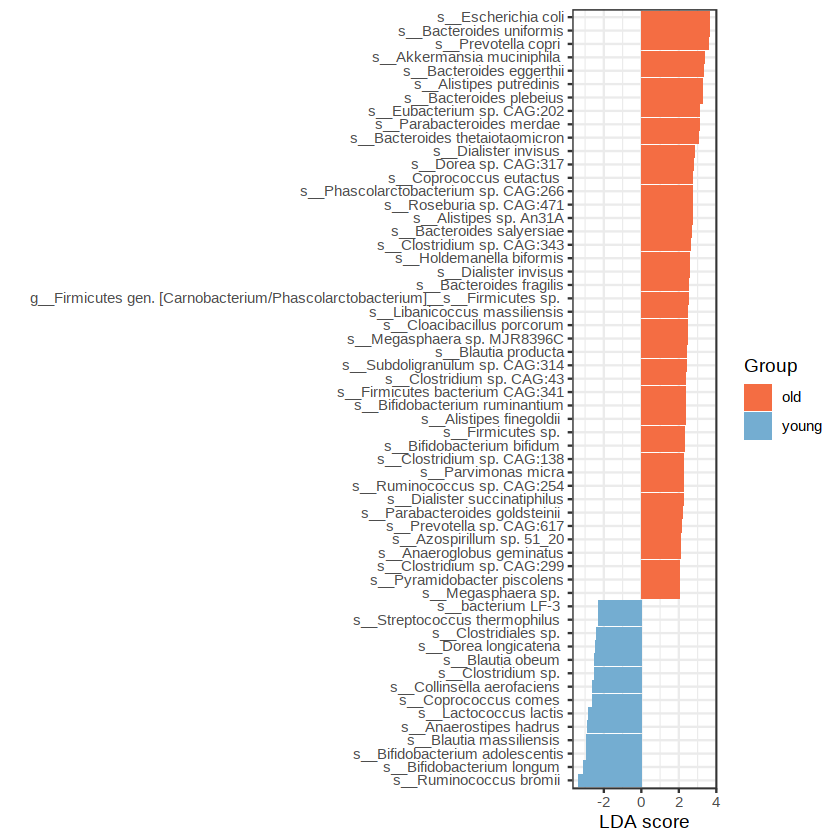

In [27]:
g1

In [29]:
pdf(paste0( '3.dif_micro/Combat_microeco/combat_after_dis_lefse_species_LDAmorethan2.pdf'),width = 7,height = 8)
cowplot::plot_grid(g1,nrow = 1)
dev.off()

png 
  2

In [30]:
pdf(paste0( '3.dif_micro/Combat_microeco/combat_after_dis_lefse_species_LDAmorethan2_2.pdf'),width = 8,height = 8)
cowplot::plot_grid(g1,nrow = 1)
dev.off()

png 
  2

In [28]:
pdf(paste0(outDir, 'combat_after_dis_lefse_species_LDAmorethan2.pdf'),width = 7,height = 8)
cowplot::plot_grid(g1,nrow = 1)
dev.off()

png 
  2

# new analysis

In [1]:
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/newanalysis/"))
if(!dir.exists(outDir)) dir.create(outDir,recursive=TRUE)

In [2]:
load('3.dif_micro/Combat_microeco/feat_all_adj_meta_tax.RData')

In [12]:
library(phyloseq)
ps = phyloseq(tax_table(as.matrix(taxonomy)), 
              sample_data(meta), 
              otu_table(feat.all_adjusted, taxa_are_rows = TRUE))
ps_sp= tax_glom(ps, taxrank=rank_names(ps)[7], NArm=TRUE, bad_empty=c(NA, "", " ", "\t"))

In [14]:
## alpha

otu_raw=otu_table(ps_sp)
meta= as(sample_data(ps_sp), "data.frame")

# aplha diversity
library(vegan)
library(dplyr)
library(picante)
#注：picante 包加载时默认同时加载 vegan，如果加载了它，可省略“library(vegan)”这一步
#读入物种数据
otu <- as.data.frame(otu_raw)
otu <- t(otu)
 
#定义函数
alpha <- function(x, tree = NULL, base = exp(1)) {
        est <- estimateR(x)
        Richness <- est[1, ]
        Chao1 <- est[2, ]
        ACE <- est[4, ]
        Shannon <- diversity(x, index = 'shannon', base = base)
        Simpson <- diversity(x, index = 'simpson')    #Gini-Simpson 指数
        Pielou <- Shannon / log(Richness, base)
        goods_coverage <- 1 - rowSums(x == 1) / rowSums(x)
        #observed_species <- specnumber(x)
        result <- data.frame(Richness, #observed_species,
                             Shannon, Simpson, Pielou, Chao1, ACE, goods_coverage)
        if (!is.null(tree)) {
                PD_whole_tree <- pd(x, tree, include.root = FALSE)[1]
                names(PD_whole_tree) <- 'PD_whole_tree'
                result <- cbind(result, PD_whole_tree)
        }
        result
}
#不包含谱系多样性，无需指定进化树；Shannon 公式的 log 底数我们使用 2
alpha_all <- alpha(otu, base = 2)
#包含谱系多样性时，指定进化树文件；Shannon 公式的 log 底数我们使用 2
#alpha_all <- alpha(otu, tree, base = 2)
#输出保存在本地
write.csv(alpha_all, paste0(outDir,'/alpha.csv'), quote = FALSE)

head(alpha_all,n=2)

head(meta,n=2)

# drawplot
stat= cbind(alpha_all,group= meta[rownames(alpha_all),'Group'])
#stat= cbind(alpha_all,group= meta[rownames(alpha_all),'Tumor_type'])
head(stat,n=2)

library(dplyr)
library(tidyr)
df <- stat %>% pivot_longer(-group) #%>% #select(-sampleID,-ICBresponse,-Simpson) 
# 先给定一些颜色
col <- c("#FB9A99","#E31A1C","#FDBF6F","#B2DF8A",
         "#A6CEE3","#BA7A70","#9D4E3F","#829BAB","#1F78B4","#33A02C")

library(paletteer) 
col= paletteer_d("unikn::pal_signal") %>% as.vector
col= col[c(1,3,2)]
col=c('#f46d43','#74add1', col)
head(df)

library(ggplot2)
library(ggpubr)
make_plot <- function(data,x,y,z){
  ggplot(data,aes(x={{x}},y={{y}},fill={{x}}))+
  #geom_violin(trim=F)+
    stat_boxplot(geom="errorbar",position=position_dodge(width=1),width=0.2)+
    geom_boxplot(position=position_dodge(width =1),width=0.5)+
    #geom_boxplot(varwidth = TRUE) + # vary boxes width according to n obs.
    #geom_jitter(alpha = 0.3, width = 0,size=2) + # adds random noise and limit its width
    stat_compare_means(aes(group = {{x}}),label.x.npc = c("middle"),label.y.npc=c("top"),label = "p.signif",vjust = 1)+
    scale_fill_manual(values={{z}})+
    facet_wrap(.~name,scales = "free",nrow = 1
              )+
    theme_bw()+
    theme(panel.spacing.x = unit(0.2,"cm"),
          panel.spacing.y = unit(0.1, "cm"),
          axis.title = element_blank(),
          strip.text.x = element_text(size=8,color="black"),
          axis.text = element_text(color="black"),
          axis.text.x = element_text(size=8,colour="black",angle=45,hjust=0.5,vjust=0.5),
          #axis.text.x=element_blank(),
          #axis.ticks.x=element_blank(),
          legend.position = "right",
          plot.margin=unit(c(0.3,0.3,0.3,0.3),units=,"cm")
         )
}

pdf(paste0(outDir,'alpha2.pdf'),width = 10,height = 4)
make_plot(subset(df, group %in% c('young','old')),group,value,col)
dev.off()

head(meta,n=2)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: ape



,Richness,Shannon,Simpson,Pielou,Chao1,ACE,goods_coverage
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR15372978,71,4.175200,0.8972255,0.6789222,116.3333,93.01664,0.9980763
SRR15372967,39,3.061134,0.8167043,0.5791676,46.5000,43.32778,0.9991101


,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.10717,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.35108,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young


,Richness,Shannon,Simpson,Pielou,Chao1,ACE,goods_coverage,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SRR15372978,71,4.175200,0.8972255,0.6789222,116.3333,93.01664,0.9980763,young
SRR15372967,39,3.061134,0.8167043,0.5791676,46.5000,43.32778,0.9991101,young


group,name,value
<chr>,<chr>,<dbl>
young,Richness,71.0000000
young,Shannon,4.1751997
young,Simpson,0.8972255
young,Pielou,0.6789222
young,Chao1,116.3333333
young,ACE,93.0166383



Attaching package: ‘ggplot2’


The following object is masked _by_ ‘.GlobalEnv’:

    alpha



Attaching package: ‘ggpubr’


The following object is masked from ‘package:ape’:

    rotate


Warning message:
“The dot-dot notation (`..p.signif..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(p.signif)` instead.”


png 
  2

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.10717,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.35108,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young


In [15]:
## distance
otu_raw=otu_table(ps_sp) %>% as.data.frame
meta= as(sample_data(ps_sp), "data.frame")
meta$group= meta$Group
table(meta$group)

head(meta,n=2)

#reset the meta information
#meta$ICBresponse2=meta$ICBresponse
#meta$ICBresponse2[meta$ICBresponse2=='not_yet']='PR'
#meta$ICBresponse2=factor(meta$ICBresponse2,levels = c('PD','SD','PR'))

#set group
meta$ICBresponse2=meta$group
group= meta$group

head(meta,n=2)

class(meta)

# prepare data
#otu <- otu_raw_filter
otu <- otu_raw
otu <- t(otu)

library(vegan)
#https://rstudio-pubs-static.s3.amazonaws.com/694016_e2d53d65858d4a1985616fa3855d237f.html
#https://mp.weixin.qq.com/s/YNwctUlA9WcVZw27wT2-lw

#https://mp.weixin.qq.com/s/ke8GObU9Pv3b32nHVKv12g
#https://r.qcbs.ca/workshop10/book-en/redundancy-analysis.html
#https://rpubs.com/Roeland-KINDT/706490
#https://rstudio-pubs-static.s3.amazonaws.com/694016_e2d53d65858d4a1985616fa3855d237f.html

### 4.1 Compute species dissimilarity between each pair of plots
##############################################
########### Species Similarity ###############
##############################################
tspmat=otu
#### Jaccard
dist_jaccard <- vegdist(tspmat, method="jaccard", binary = TRUE)
#### Morisita
dist_Morisita <- vegdist(tspmat, method="morisita")
#### Horn–Morisita
dist_horn_morisita <- vegdist(tspmat, method="horn")
#### Bray-Curtis
dist_bray <- vegdist(tspmat, method="bray")
#### Chao
dist_chao <- vegdist(tspmat, method="chao")
#
### 4.4 Convert the distance matrices to vectors
#############################################
############################################
res_betadisper_jaccard       <- betadisper(dist_jaccard,       group = meta$ICBresponse2)
res_betadisper_horn_morisita <- betadisper(dist_horn_morisita, group  = meta$ICBresponse2)

res_betadisper_Morisita      <- betadisper(dist_Morisita,      group  = meta$ICBresponse2)

res_betadisper_bray          <- betadisper(dist_bray,          group = meta$ICBresponse2)
res_betadisper_chao          <- betadisper(dist_chao,          group = meta$ICBresponse2)
#
#### Comparison of different groups
anova_sig_jaccard= anova(res_betadisper_jaccard         )
anova_sig_horn_morisita=anova(res_betadisper_horn_morisita   )
anova_sig_Morisita=anova(res_betadisper_Morisita         )
anova_sig_bray=anova(res_betadisper_bray         )
anova_sig_chao= anova(res_betadisper_chao         )
####
scores_jaccard  =scores(res_betadisper_jaccard        )
scores_horn_morisita  =scores(res_betadisper_horn_morisita  )
scores_Morisita  =scores(res_betadisper_Morisita        )
scores_bray  =scores(res_betadisper_bray        )
scores_chao  =scores(res_betadisper_chao        )

#### Pairwise comparison
#TukeyHSD(res_betadisper_jaccard      )
# TukeyHSD(res_betadisper_horn_morisita)
# TukeyHSD(res_betadisper_Morisita     )
#TukeyHSD(res_betadisper_bray     )
# TukeyHSD(res_betadisper_chao     )

pdf(paste0(outDir, '/PCoA_dis.pdf'),height = 8,width = 20)
par(mfrow=c(2,5))
plot(res_betadisper_jaccard,
     ellipse = T, hull = F, #
     #xlim = c(-.5, .5), ylim = c(-.8, .3),
     main = "Distribution of Jaccard dissimilarity", col = c("red", "orange", "gold", "green", "blue"))
      text(x = quantile(scores_jaccard$sites[,1])[5]-0.1, y = quantile(scores_jaccard$sites[,2])[5]-0.1,  "ANOVA")
      text(x = quantile(scores_jaccard$sites[,1])[5]-0.1, y =quantile(scores_jaccard$sites[,2])[5]-0.2, 
           round( anova_sig_jaccard$`Pr(>F)`[1],2) )

plot(res_betadisper_Morisita,
     ellipse = TRUE, hull = FALSE, #xlim = c(-.7, .7), ylim = c(-.3, 1.0),
     main = "Distribution of Morisita dissimilarity", col = c("red", "orange", "gold", "green", "blue"))
text(x = quantile(scores_Morisita$sites[,1])[5]-0.1, y = quantile(scores_Morisita$sites[,2])[5]-0.1,  "ANOVA")
text(x = quantile(scores_Morisita$sites[,1])[5]-0.1, y =quantile(scores_Morisita$sites[,2])[5]-0.2,  
     round( anova_sig_Morisita$`Pr(>F)`[1],2) )


plot(res_betadisper_horn_morisita,
     ellipse = TRUE, hull = FALSE, #xlim = c(-.7, .7), ylim = c(-.3, 1.0),
     main = "Distribution of Horn-Morisita dissimilarity", col = c("red", "orange", "gold", "green", "blue"))
text(x = quantile(scores_horn_morisita$sites[,1])[5]-0.1, y = quantile(scores_horn_morisita$sites[,2])[5]-0.1,  "ANOVA")
text(x = quantile(scores_horn_morisita$sites[,1])[5]-0.1, y =quantile(scores_horn_morisita$sites[,2])[5]-0.2,  
     round( anova_sig_horn_morisita$`Pr(>F)`[1],2) )


plot(res_betadisper_bray,
     ellipse = TRUE, hull = FALSE, #xlim = c(-.7, .7), ylim = c(-.3, 1.0),
     main = "Distribution of Bray-Curtis dissimilarity", col = c("red", "orange", "gold", "green", "blue"))
text(x = quantile(scores_bray$sites[,1])[5]-0.1, y = quantile(scores_bray$sites[,2])[5]-0.1,  "ANOVA")
text(x = quantile(scores_bray$sites[,1])[5]-0.1, y =quantile(scores_bray$sites[,2])[5]-0.2,  
     round( anova_sig_bray$`Pr(>F)`[1],2) )


plot(res_betadisper_chao,
     ellipse = TRUE, hull = FALSE, #xlim = c(-.7, .7), ylim = c(-.3, 1.0),
     main = "Distribution of Chao dissimilarity", col = c("red", "orange", "gold", "green", "blue"))
text(x = quantile(scores_chao$sites[,1])[5]-0.1, y = quantile(scores_chao$sites[,2])[5]-0.1,  "ANOVA")
text(x = quantile(scores_chao$sites[,1])[5]-0.1, y =quantile(scores_chao$sites[,2])[5]-0.2,  
     round( anova_sig_chao$`Pr(>F)`[1],2) )

#
boxplot(res_betadisper_jaccard,
        col = c("red", "orange", "gold", "green", "blue"),
        main = "Jaccard dissimilarity",
        xlab = "Group")
boxplot(res_betadisper_Morisita,
        col = c("red", "orange", "gold", "green", "blue"),
        main = "Morisita dissimilarity",
        xlab = "Group")
boxplot(res_betadisper_horn_morisita,
        col = c("red", "orange", "gold", "green", "blue"),
        main = "Horn-Morisita dissimilarity",
        xlab = "Group")
boxplot(res_betadisper_bray,
        col = c("red", "orange", "gold", "green", "blue"),
        main = "Bray-Curtis dissimilarity",
        xlab = "Group")
boxplot(res_betadisper_chao,
        col = c("red", "orange", "gold", "green", "blue"),
        main = "Chao dissimilarity",
        xlab = "Group")
dev.off()
#

#####
library(ggthemes)
my_col=c('#f46d43','#74add1',"#7F3C8DFF", '#11A579FF',  '#3969ACFF',  '#F2B701FF',  '#E73F74FF',
         '#80BA5AFF', '#E68310FF', '#008695FF', '#CF1C90FF', '#F97B72FF', '#4B4B8FFF',  '#A5AA99FF',
         '#B2DF8AFF',  '#33A02CFF',  '#FB9A99FF',  '#E31A1CFF',
         '#FDBF6FFF',  '#FF7F00FF',  '#CAB2D6FF',  '#6A3D9AFF',  '#FFFF99FF',  '#B15928FF', '#A6CEE3FF',  '#1F78B4FF'
)
library(ggplot2)
mytheme=theme(legend.position = "right",
              #legend.justification = c(0,1),
              #legend.title = element_blank(),
              legend.text = element_text(size=10),
              legend.title = element_text(size=10),
              aspect.ratio = 1,
              plot.margin = margin(t=5,r=20,b=5,l=20,unit="pt"),
              axis.title.y = element_text(size=10,colour="black"),
              axis.title.x = element_text(size=10,colour="black"),
              #axis.title.x = element_blank(),
              axis.text = element_text(size=10,colour="black",angle=0),
              axis.text.x = element_text(size=10,colour="black",angle=0,hjust=0.5,vjust=0.5),
              #axis.text.x = element_blank(),
              plot.title = element_text(size=10,face="bold",hjust = 0.5),
              panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(),
              panel.background = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=0.5),
              axis.line = element_line(colour = "black"),
              axis.ticks.length=unit(.1, "cm"),
              axis.ticks = element_line(colour = "black", size = 0.5)
)

disid= c('bray','horn','jaccard','morisita','chao' )
myplots1=list()
myplots2=list()
for (i in 1:length(disid)) {
  # calculate PERMANOVA p value
  adonis_drug <- adonis(tspmat~group, meta, distance = disid[i], permutations = 999)
  adpvalue= adonis_drug$aov.tab[1,6]
  # 
  ## NMDS1
  NMDS_horn <- metaMDS(tspmat, distance = disid[i], autotransform = FALSE, k = 2, try = 100)
  MDS1 = NMDS_horn$points[,1]
  MDS2 = NMDS_horn$points[,2]
  LAB  = row.names(NMDS_horn$points)
  NMDS = data.frame(MDS1 = MDS1, MDS2 = MDS2, group = as.factor(group), LAB = LAB)
  centers <- aggregate(NMDS[, 1:2], by=list(group=NMDS$group), mean)
  centers$LAB <- paste("Center for group:", as.character(centers$group))
  centers2 <- centers[c(2,3,1,4)]
  ### colnames(centers) <- c("group", "x", "y")
  # tiff(filename = "NMDS_horn.tiff", width = 4800, height = 4800, res = 600, compression = "lzw")
  myplots1[[i]]=ggplot(NMDS, aes(x=MDS1, y=MDS2, col=group, label = NMDS$LAB)) +
    geom_point() +
    stat_ellipse(level = 0.60, show.legend = TRUE,  type = "norm", lwd = 1.2) +
    theme_bw() +
    labs(title = paste0("NMDS of ",disid[i], '\n','PERMANOVA','\n' ,adpvalue))+
    scale_color_manual(values= my_col) +
    xlab("NMDS 1") +
    ylab("NMDS 2") +
    theme_base() +mytheme+
    geom_text(check_overlap = TRUE, aes(y = MDS2 + 0.035), show.legend=FALSE)
  #https://mp.weixin.qq.com/s/5EjfeHdOCFLFO9XX972Pag 
  #--------nmds排序函数#---
  ord <- metaMDS(tspmat, distance = disid[i], autotransform = FALSE, k = 2, try = 100)
  scrs <- scores(ord, display = 'sites')
  # 组合排序坐标和分组信息
  scrs <- cbind(as.data.frame(scrs), group = group)
  # 求均值
  cent <- aggregate(cbind(NMDS1, NMDS2) ~ group, data = scrs, FUN = mean)
  # 合并到样本坐标数据中
  segs <- merge(scrs, setNames(cent, c('group','oNMDS1','oNMDS2')),
                by = 'group', sort = FALSE)
  scrs$LAB= rownames(scrs)
  
  myplots2[[i]]= ggplot(scrs, aes(x = NMDS1, y = NMDS2, col = group)) +
    geom_segment(data = segs,
                 mapping = aes(xend = oNMDS1, yend = oNMDS2)) + # spiders
    geom_point(data = cent, size = 5) +                         # centroids
    geom_point() +                                              # sample scores
    coord_fixed() +                                             # same axis scaling
    stat_ellipse(level = 0.60, show.legend = TRUE,  type = "norm", lwd = 1.2) +
    theme_bw() +mytheme+scale_color_manual(values= my_col)+
    labs(title = paste0("NMDS of ",disid[i], '\n','PERMANOVA','\n' ,adpvalue))
  
}

pdf(paste0(outDir,'NMDS_dis2.pdf'),width = 25,height = 10)
ggpubr::ggarrange(myplots1[[1]],myplots1[[2]],myplots1[[3]],myplots1[[4]],myplots1[[5]],
                  myplots2[[1]],myplots2[[2]],myplots2[[3]],myplots2[[4]],myplots2[[5]],
                  nrow = 2,
                  ncol = 5)
dev.off()


disid= c('bray','horn','jaccard','morisita','chao' )

myplot=list()

for (i in 1:length(disid)) {
  #使用vegan包中的anosim函数进行anosim分析
  df_anosim <- anosim(otu,meta$group,permutations = 999,distance = disid[i])#数据也可以是原始otu数据
  #df_anosim <- adonis2(otu~group,meta,permutations = 999,distance = 'bray')#数据也可以是原始otu数据
  #df_anosim <- anosim(otu,df$group,permutations = 999)
  #整理出作图数据
  df1<-data.frame(
    x=df_anosim$class.vec,
    y=df_anosim$dis.rank
  )
  #绘图
  library(ggprism)
  myplot[[i]]=ggplot(df1,aes(x=x,y=y))+
    stat_boxplot(geom = "errorbar", width=0.1,size=0.8)+#添加误差线,注意位置，放到最后则这条先不会被箱体覆盖
    geom_boxplot(aes(fill=x), 
                 outlier.colour="white",size=0.5,width=0.5)+
    theme(panel.background =element_blank(), 
          axis.line=element_line(),
          legend.position="none",plot.title = element_text(size=14))+
    #scale_fill_manual(values=c("#1597A5","#FFC24B","#FEB3AE","red"))+ #指定颜色
    scale_fill_manual(values=my_col)+ #指定颜色
    ggtitle(paste0(disid[[i]],"-Curtis Anosim"))+
    theme_prism(palette = "candy_bright",
                base_fontface = "plain",
                base_family = "serif", 
                base_size = 14,  
                base_line_size = 0.8, 
                axis_text_angle = 45)+
    theme(legend.position = 'none')+
    labs(x = paste("R=",df_anosim$statistic,", ","p=", df_anosim$signif),
         y = "Rank of Distance")
  
}

pdf(paste0(outDir,'boxplot_anosim_dis.pdf'),width = 25,height = 5)
ggpubr::ggarrange(myplot[[1]],myplot[[2]],myplot[[3]],myplot[[4]],myplot[[5]],
                  nrow = 1,
                  ncol = 5)
dev.off()


  old young 
  511   271 

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group,group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.10717,0,1,no,⋯,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.35108,0,1,no,⋯,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young,young


,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group,group,ICBresponse2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.10717,0,1,no,⋯,NA,NA,NA,NA,28.2,overweight,SRR15372978,young,young,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.35108,0,1,no,⋯,NA,NA,NA,NA,25.4,overweight,SRR15372967,young,young,young


[1] "data.frame"

Warning message in betadisper(dist_chao, group = meta$ICBresponse2):
“some squared distances are negative and changed to zero”


png 
  2

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
'adonis' will be deprecated: use 'adonis2' instead



Run 0 stress 0.1711873 
Run 1 stress 0.1728714 
Run 2 stress 0.1728689 
Run 3 stress 0.1748152 
Run 4 stress 0.1722476 
Run 5 stress 0.1726873 
Run 6 stress 0.1722382 
Run 7 stress 0.1740133 
Run 8 stress 0.1734906 
Run 9 stress 0.1755629 
Run 10 stress 0.1771291 
Run 11 stress 0.1733993 
Run 12 stress 0.1752763 
Run 13 stress 0.173075 
Run 14 stress 0.1741821 
Run 15 stress 0.172331 
Run 16 stress 0.1724328 
Run 17 stress 0.1749089 
Run 18 stress 0.1721415 
Run 19 stress 0.1742508 
Run 20 stress 0.1726043 
*** Best solution was not repeated -- monoMDS stopping criteria:
    19: no. of iterations >= maxit
     1: stress ratio > sratmax


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Run 0 stress 0.1711873 
Run 1 stress 0.1711041 
... New best solution
... Procrustes: rmse 0.01359248  max resid 0.2223459 
Run 2 stress 0.1742641 
Run 3 stress 0.1748635 
Run 4 stress 0.173878 
Run 5 stress 0.1746285 
Run 6 stress 0.1732904 
Run 7 stress 0.1720783 
Run 8 stress 0.1728519 
Run 9 stress 0.1750918 
Run 10 stress 0.1732341 
Run 11 stress 0.1767842 
Run 12 stress 0.1762807 
Run 13 stress 0.1748317 
Run 14 stress 0.1753021 
Run 15 stress 0.1729279 
Run 16 stress 0.1737612 
Run 17 stress 0.1730661 
Run 18 stress 0.1760902 
Run 19 stress 0.1761445 
Run 20 stress 0.1747289 
*** Best solution was not repeated -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


'adonis' will be deprecated: use 'adonis2' instead



Run 0 stress 0.2409327 
Run 1 stress 0.2447524 
Run 2 stress 0.2438721 
Run 3 stress 0.2402269 
... New best solution
... Procrustes: rmse 0.03058212  max resid 0.2118315 
Run 4 stress 0.2423043 
Run 5 stress 0.2420218 
Run 6 stress 0.2418091 
Run 7 stress 0.2443329 
Run 8 stress 0.2399131 
... New best solution
... Procrustes: rmse 0.03098886  max resid 0.2087417 
Run 9 stress 0.24403 
Run 10 stress 0.2443026 
Run 11 stress 0.2419984 
Run 12 stress 0.2442467 
Run 13 stress 0.2427225 
Run 14 stress 0.2430056 
Run 15 stress 0.2439173 
Run 16 stress 0.2438393 
Run 17 stress 0.2380406 
... New best solution
... Procrustes: rmse 0.01951907  max resid 0.2023956 
Run 18 stress 0.2400886 
Run 19 stress 0.2411935 
Run 20 stress 0.241748 
*** Best solution was not repeated -- monoMDS stopping criteria:
    20: no. of iterations >= maxit
Run 0 stress 0.2409327 
Run 1 stress 0.2437099 
Run 2 stress 0.2404046 
... New best solution
... Procrustes: rmse 0.02975815  max resid 0.2119459 
Run 3 stress

'adonis' will be deprecated: use 'adonis2' instead



Run 0 stress 0.1710103 
Run 1 stress 0.1768395 
Run 2 stress 0.1715258 
Run 3 stress 0.1749688 
Run 4 stress 0.1755948 
Run 5 stress 0.1722034 
Run 6 stress 0.1712905 
... Procrustes: rmse 0.01956518  max resid 0.3960615 
Run 7 stress 0.1778891 
Run 8 stress 0.1737106 
Run 9 stress 0.17264 
Run 10 stress 0.1757453 
Run 11 stress 0.173452 
Run 12 stress 0.1738027 
Run 13 stress 0.1764126 
Run 14 stress 0.175694 
Run 15 stress 0.1746331 
Run 16 stress 0.4201252 
Run 17 stress 0.1729924 
Run 18 stress 0.1724487 
Run 19 stress 0.176596 
Run 20 stress 0.1763064 
*** Best solution was not repeated -- monoMDS stopping criteria:
    16: no. of iterations >= maxit
     3: stress ratio > sratmax
     1: scale factor of the gradient < sfgrmin
Run 0 stress 0.1710103 
Run 1 stress 0.1774562 
Run 2 stress 0.1777403 
Run 3 stress 0.1731849 
Run 4 stress 0.1708721 
... New best solution
... Procrustes: rmse 0.01862601  max resid 0.190285 
Run 5 stress 0.173539 
Run 6 stress 0.1708748 
... Procrustes: 

'adonis' will be deprecated: use 'adonis2' instead



Run 0 stress 0.2410356 
Run 1 stress 0.2402255 
... New best solution
... Procrustes: rmse 0.02730291  max resid 0.1758657 
Run 2 stress 0.2435578 
Run 3 stress 0.2419654 
Run 4 stress 0.242804 
Run 5 stress 0.2402718 
... Procrustes: rmse 0.02076784  max resid 0.2108831 
Run 6 stress 0.2420426 
Run 7 stress 0.2465707 
Run 8 stress 0.2451091 
Run 9 stress 0.2420216 
Run 10 stress 0.2430892 
Run 11 stress 0.2431889 
Run 12 stress 0.2461863 
Run 13 stress 0.2410612 
Run 14 stress 0.2444616 
Run 15 stress 0.2402534 
... Procrustes: rmse 0.0255113  max resid 0.2115324 
Run 16 stress 0.2413279 
Run 17 stress 0.2409241 
Run 18 stress 0.240293 
... Procrustes: rmse 0.02384014  max resid 0.1883252 
Run 19 stress 0.2420108 
Run 20 stress 0.2428945 
*** Best solution was not repeated -- monoMDS stopping criteria:
    20: no. of iterations >= maxit
Run 0 stress 0.2410356 
Run 1 stress 0.2423686 
Run 2 stress 0.2427216 
Run 3 stress 0.2422032 
Run 4 stress 0.2429181 
Run 5 stress 0.2424749 
Run 6 

'adonis' will be deprecated: use 'adonis2' instead



Run 0 stress 0.2884396 
Run 1 stress 0.28914 
Run 2 stress 0.2878751 
... New best solution
... Procrustes: rmse 0.02193207  max resid 0.310159 
Run 3 stress 0.2868359 
... New best solution
... Procrustes: rmse 0.01756053  max resid 0.2314098 
Run 4 stress 0.2923146 
Run 5 stress 0.2867377 
... New best solution
... Procrustes: rmse 0.01181423  max resid 0.1166086 
Run 6 stress 0.2886407 
Run 7 stress 0.2885612 
Run 8 stress 0.2881123 
Run 9 stress 0.2879391 
Run 10 stress 0.2877216 
Run 11 stress 0.2913272 
Run 12 stress 0.2911711 
Run 13 stress 0.2887302 
Run 14 stress 0.2893624 
Run 15 stress 0.2883809 
Run 16 stress 0.2925154 
Run 17 stress 0.2883306 
Run 18 stress 0.2877766 
Run 19 stress 0.2888554 
Run 20 stress 0.2885988 
*** Best solution was not repeated -- monoMDS stopping criteria:
    20: no. of iterations >= maxit
Run 0 stress 0.2884396 
Run 1 stress 0.287957 
... New best solution
... Procrustes: rmse 0.02350222  max resid 0.3011362 
Run 2 stress 0.2908235 
Run 3 stress 

Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the

png 
  2

png 
  2

In [18]:


#####
library(dplyr)
library(tidyverse)
library(phyloseq)
library(microeco)
library(magrittr)
#####***create microtable obj
#####
#dataset <- microtable$new(sample_table = meta, otu_table = otu_raw_filter, tax_table = tax_filter)
dataset <- microtable$new(sample_table = meta, otu_table = feat.all_adjusted, tax_table = taxonomy)

dataset$sample_table$group=dataset$sample_table$Group

#dataset$tax_table %<>% base::subset(Kingdom == "d__Bacteria")
#save(dataset,file='16s.Rdat')
# 移除tax_table中包含taxa名字的行，无论分类等级（taxonomic ranks），不区分大小写字母。简言之，taxa = c("mitochondria", "chloroplast")定义了删除包含mitochondria和chloroplast的行。
dataset$filter_pollution(taxa = c("mitochondria", "chloroplast"))
print(dataset)
#
dataset$tidy_dataset()
print(dataset)
dataset$sample_sums() %>% range
####
####
####*** cal abundance
####
dataset$cal_abund()
# return dataset$taxa_abund
class(dataset$taxa_abund)
# show part of the relative abundance at Phylum level
dataset$taxa_abund$Phylum[1:5, 1:5]
####
####***cal alpha
####
# 若要计算Faith's phylogenetic diversity，设置PD = TRUE，计算速度会较慢
dataset$cal_alphadiv(PD = FALSE)
# return dataset$alpha_diversity
class(dataset$alpha_diversity)
####
####***cal beta
# If you do not want to calculate unifrac metrics, use unifrac = FALSE
# 需要GUniFrac package
#install.packages("GUniFrac")
dataset$cal_betadiv(unifrac = F)
# return dataset$beta_diversity
class(dataset$beta_diversity)
####***
####***Diversity-based class
#####alpha
t1 <- trans_alpha$new(dataset = dataset, group = "group")
# return t1$alpha_stat
t1$data_stat[1:5, ]
#*for two groups
t1$cal_diff(method = "KW")
# return t1$res_alpha_diff
t1$res_diff
######
######*****beta
######
# we first create an trans_beta object
# measure parameter can invoke the distance matrix in dataset$beta_diversity
t2 <- trans_beta$new(dataset = dataset, group = "group", measure = "bray")
# use PCoA as an example, PCA or NMDS is also available
t2$cal_ordination(ordination = "PCoA")
# t1$res_ordination is the ordination result list
class(t2$res_ordination)
# calculate and plot sample distances within groups
t2$cal_group_distance(within_group = TRUE)
# manova for all groups when manova_all = TRUE
t2$cal_manova(manova_all = TRUE)
t2$res_manova
#####
#####
# t1$res_diff is the differential test result
# t1$res_abund is the group abundance
#t3 <- trans_diff$new(dataset = dataset, method = "lefse", group = "group", alpha = 0.5, lefse_subgroup = NULL)

head(t2$res_group_distance)

library(ggthemes)
my_col=c('#f46d43','#74add1',"#7F3C8DFF", '#11A579FF',  '#3969ACFF',  '#F2B701FF',  '#E73F74FF',
         '#80BA5AFF', '#E68310FF', '#008695FF', '#CF1C90FF', '#F97B72FF', '#4B4B8FFF',  '#A5AA99FF',
         '#B2DF8AFF',  '#33A02CFF',  '#FB9A99FF',  '#E31A1CFF',
         '#FDBF6FFF',  '#FF7F00FF',  '#CAB2D6FF',  '#6A3D9AFF',  '#FFFF99FF',  '#B15928FF', '#A6CEE3FF',  '#1F78B4FF'
)
library(ggprism)
myplot=ggplot(t2$res_group_distance,aes(x=group,y=value))+
 #geom_jitter(alpha = 0.8, width = 0,size=2) +
    #stat_boxplot(geom = "errorbar", width=0.1,size=0.8)+#添加误差线,注意位置，放到最后则这条先不会被箱体覆盖
    geom_boxplot(aes(fill=group), 
                 #outlier.colour="white",
                 size=0.5,width=0.5)+
    theme(panel.background =element_blank(), 
          axis.line=element_line(),
          legend.position="none",plot.title = element_text(size=14))+
    #scale_fill_manual(values=c("#1597A5","#FFC24B","#FEB3AE","red"))+ #指定颜色
    scale_fill_manual(values=my_col)+ #指定颜色
    stat_compare_means()+
    ggtitle(paste0("Beta diversity"))+
    #theme_prism(palette = "candy_bright",
    #            base_fontface = "plain",
    #            base_family = "serif", 
    #            base_size = 14,  
    #            base_line_size = 0.8, 
    #            axis_text_angle = 45)+
    theme(legend.position = 'right')+ylab('Bray-Curtis distance')

pdf(paste0(outDir, 'Beta_div.pdf'),width = 5,height = 5)
cowplot::plot_grid(myplot,nrow = 1)
dev.off()

# create trans_abund object
# use 10 Phyla with the highest abundance in the dataset.
t1 <- trans_abund$new(dataset = dataset, taxrank = "Phylum", ntaxa = 10)
#   draw
#color
library(paletteer) 
mycol=as.vector(paletteer_d("rcartocolor::Vivid"))
mycol
pg=t1$plot_bar(others_color = "grey70", facet = "group", xtext_keep = TRUE, 
            legend_text_italic = TRUE,
            color_values = mycol)+
theme(legend.position = "right",
     
        axis.text.x = element_text(size=8,colour="black",angle=45,hjust=1,vjust=1)

  )
# return a ggplot2 object
pdf(paste0(outDir, 'stacked_Phylum_sample.pdf'),width = 7,height = 5)
cowplot::plot_grid(pg,nrow = 1)
dev.off()
#
####
# The groupmean parameter can be used to obtain the group-mean barplot.
t1 <- trans_abund$new(dataset = dataset, taxrank = "Phylum", ntaxa = 10, groupmean = "group")
g1 <- t1$plot_bar(others_color = "grey70", legend_text_italic = FALSE, color_values = mycol)
pg2=g1 + theme_classic() + theme(axis.title.y = element_text(size = 18))

pdf(paste0(outDir, 'stacked_Phylum_group.pdf'),width = 5,height = 4)
cowplot::plot_grid(pg2,nrow = 1)
dev.off()

### calculate Firmacute/Bacteriodes ratio
###
library(dplyr)
abu=dataset$taxa_abund$Phylum
abu$phylum= sapply(stringr::str_split(rownames(abu), "[|]"), `[`, 2)

abugg= abu %>% group_by(phylum) %>% summarise_all(mean) %>% as.data.frame
rownames(abugg)=abugg$phylum
abugg=abugg[,-1] %>% t %>% as.data.frame
abugg$FBratio= abugg$p__Firmicutes/abugg$p__Bacteroidetes
abugg=cbind(abugg, meta)

library(ggpubr)
library(paletteer) 
col= paletteer_d("unikn::pal_signal") %>% as.vector
col=col[c(1,3,2)]

g3=ggplot(abugg,mapping = aes(x=group,y=FBratio,color=group))+
  stat_boxplot(geom="errorbar",position=position_dodge(width=0.2),width=0.3)+
  geom_boxplot(aes(),notch = F,outlier.shape = NA)+
  stat_compare_means(label = "p.signif")+
  geom_jitter(binaxis="FBratio",position = position_jitter(0.2),satckdir="center",dotsize=0.6,size=5,alpha=0.7)+
  labs(x="", y="Firmicutes/Bacteroidetes ratio", title = "")+ theme_bw(base_line_size = 1.05,base_rect_size = 1.05)+
  theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank())+
  scale_color_manual(values=col)+#颜色
  scale_fill_manual(values=col)+#颜色
  theme(axis.text=element_text(colour='black',size=9))

pdf(paste0(outDir, 'box_Firmicutes_Bacteroidetes_ratio.pdf'),width = 4,height = 4)
cowplot::plot_grid(g3,nrow = 1)
dev.off()


Total 0 taxa are removed from tax_table ...



microtable-class object:
sample_table have 782 rows and 34 columns
otu_table have 1263 rows and 782 columns
tax_table have 33569 rows and 7 columns
microtable-class object:
sample_table have 782 rows and 34 columns
otu_table have 1263 rows and 782 columns
tax_table have 1263 rows and 7 columns


[1]        312 1669002451

The result is stored in object$taxa_abund ...



[1] "list"

,SRR15372978,SRR15372967,SRR15372934,SRR15372933,SRR15372932
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Bacteria|p__Firmicutes,0.9640149372,0.664342925,0.668348955,0.3105975898,0.832970034
k__Bacteria|p__Bacteroidetes,0.0002263211,0.306882231,0.271809661,0.5154677600,0.070541272
k__Bacteria|p__Proteobacteria,0.0198031006,0.022100267,0.047344388,0.0377686669,0.002888883
k__Bacteria|p__Verrucomicrobia,0.0000000000,0.000000000,0.008050949,0.1126848056,0.008535336
k__Bacteria|p__Actinobacteria,0.0159556411,0.006674577,0.003364576,0.0004969561,0.002494944


The result is stored in object$alpha_diversity ...



[1] "data.frame"

The result is stored in object$beta_diversity ...



[1] "list"

The transformed diversity data is stored in object$data_alpha ...

The group statistics are stored in object$data_stat ...



,group,Measure,N,Mean,SD,SE
,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,old,Observed,511,235.6536204,82.1251041,3.63300071
2,old,Chao1,511,394.5495701,158.4954837,7.01142740
3,old,ACE,511,327.1067122,116.5375796,5.15531900
4,old,Shannon,511,3.1432678,1.0612330,0.04694618
5,old,Simpson,511,0.8238912,0.2299305,0.01017153


The result is stored in object$res_diff ...



Comparison,Measure,Test_method,Group,P.unadj,P.adj,Significance
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
young - old,Observed,Kruskal-Wallis Rank Sum Test,young,0.9990710,0.999071,ns
young - old,Chao1,Kruskal-Wallis Rank Sum Test,old,0.9065171,0.999071,ns
young - old,ACE,Kruskal-Wallis Rank Sum Test,old,0.8709045,0.999071,ns
young - old,Shannon,Kruskal-Wallis Rank Sum Test,old,0.9441720,0.999071,ns
young - old,Simpson,Kruskal-Wallis Rank Sum Test,old,0.7259870,0.999071,ns
young - old,InvSimpson,Kruskal-Wallis Rank Sum Test,old,0.7259870,0.999071,ns
young - old,Fisher,Kruskal-Wallis Rank Sum Test,old,0.5628046,0.999071,ns


The ordination result is stored in object$res_ordination ...



[1] "list"

The result is stored in object$res_group_distance ...

The result is stored in object$res_manova ...



,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
group,1,0.8312465,0.002601958,2.034822,0.001
Residual,780,318.6383026,0.997398042,NA,NA
Total,781,319.4695491,1.000000000,NA,NA


,value,group
,<dbl>,<chr>
1,0.8686694,young
2,0.9249805,young
3,0.8835958,young
4,0.8623606,young
5,0.9882707,young
6,0.9695168,young


png 
  2

The transformed abundance data is stored in object$data_abund ...



[1] "#E58606FF" "#5D69B1FF" "#52BCA3FF" "#99C945FF" "#CC61B0FF" "#24796CFF"
 [7] "#DAA51BFF" "#2F8AC4FF" "#764E9FFF" "#ED645AFF" "#CC3A8EFF" "#A5AA99FF"

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


png 
  2

group column is used to calculate mean abundance ...

The transformed abundance data is stored in object$data_abund ...



png 
  2

Warning message in geom_jitter(binaxis = "FBratio", position = position_jitter(0.2), :
“Ignoring unknown parameters: `binaxis`, `satckdir`, and `dotsize`”
Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_compare_means()`).”


png 
  2

In [1]:
## do pool wilcox
rm(list=ls())
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/newanalysis/"))
feat.all= read.csv('3.dif_micro/Combat_microeco/dataset_microeco_species_matrix.csv',header=T, row.names = 1)
meta= read.csv('3.dif_micro/Combat_microeco/dataset_microeco_meta_clin.csv',header=T, row.names=1)


In [2]:
ls()

[1] "feat.all" "meta"     "outDir"

In [3]:
dim(feat.all)

[1] 485 782

In [4]:
head(meta)

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.107166,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.351085,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young
SRR15372934,LUM_249,SRR15372934,France,64,23.0,female,1.216305,1,1,yes,⋯,NA,NA,NA,NA,NA,NA,23.0,lean,SRR15372934,old
SRR15372933,LUM_250,SRR15372933,France,68,17.9,female,13.379356,1,1,no,⋯,NA,NA,NA,NA,NA,NA,17.9,lean,SRR15372933,old
SRR15372932,LUM_251,SRR15372932,France,61,26.5,male,43.754109,0,1,yes,⋯,NA,NA,NA,NA,NA,NA,26.5,overweight,SRR15372932,old
SRR15372931,LUM_252,SRR15372931,France,60,18.5,female,4.372124,1,1,no,⋯,NA,NA,NA,NA,NA,NA,18.5,lean,SRR15372931,young


In [5]:
ps= feat.all
groupings= meta
groupings$group= groupings$Group

In [11]:
##
count_norm= as.data.frame(ps)
metasel= groupings
metasel$id= rownames(metasel)
head(metasel)
conditions=metasel$group
#log.n0= 1e-05
#
pvalues <- sapply(1:nrow(count_norm),function(i){
     data<-cbind.data.frame(gene=as.numeric(t(count_norm[i,])),conditions)
     p=wilcox.test(gene~conditions, data,exact=FALSE)$p.value
     return(p)
   })
fdr=p.adjust(pvalues,method = "fdr")
#
#conditionsLevel<-unique(conditions)
conditionsLevel = c('young','old')
dataCon1=count_norm[,c(which(conditions==conditionsLevel[1]))]
dataCon2=count_norm[,c(which(conditions==conditionsLevel[2]))]
foldChanges=log2(rowMeans(dataCon2)/rowMeans(dataCon1))

#
mean_case= rowMeans(dataCon2)
mean_control=rowMeans(dataCon1)
# FC
fc <- matrix(NA, nrow=nrow(count_norm), ncol=1, 
                dimnames=list(row.names(count_norm), c('all')))
# caluclate wilcoxon test and effect size for each feature and study
for (f in row.names(count_norm)) {
    library(dplyr)
    x <- count_norm[f, metasel  %>% 
                    filter(group==conditionsLevel[1]) %>% pull(id)] %>% as.numeric
    #x= x[!is.na(x)]
    y <- count_norm[f, metasel  %>% 
                    filter(group==conditionsLevel[2]) %>% pull(id)] %>% as.numeric
    #y= y[!is.na(y)]
    # FC
    q.p <- quantile(y, probs=seq(.1, .9, .05),na.rm = T)
    q.n <- quantile(x, probs=seq(.1, .9, .05),na.rm = T)
    fc[f, 'all']<- sum(q.p - q.n)/length(q.p)
}
fc=as.data.frame(fc)
#
outRst<-data.frame(logFC=fc[,1], 
                   mean_case=mean_case,
				   mean_control=mean_control,
                   pValues=pvalues, 
				   FDR=fdr)
rownames(outRst)=rownames(count_norm)

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group,group,id
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.107166,0,1,no,⋯,NA,NA,NA,NA,28.2,overweight,SRR15372978,young,young,SRR15372978
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.351085,0,1,no,⋯,NA,NA,NA,NA,25.4,overweight,SRR15372967,young,young,SRR15372967
SRR15372934,LUM_249,SRR15372934,France,64,23.0,female,1.216305,1,1,yes,⋯,NA,NA,NA,NA,23.0,lean,SRR15372934,old,old,SRR15372934
SRR15372933,LUM_250,SRR15372933,France,68,17.9,female,13.379356,1,1,no,⋯,NA,NA,NA,NA,17.9,lean,SRR15372933,old,old,SRR15372933
SRR15372932,LUM_251,SRR15372932,France,61,26.5,male,43.754109,0,1,yes,⋯,NA,NA,NA,NA,26.5,overweight,SRR15372932,old,old,SRR15372932
SRR15372931,LUM_252,SRR15372931,France,60,18.5,female,4.372124,1,1,no,⋯,NA,NA,NA,NA,18.5,lean,SRR15372931,young,young,SRR15372931



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [12]:
head(outRst)

,logFC,mean_case,mean_control,pValues,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales fam. incertae sedis|g__Clostridiales gen. incertae sedis|s__Clostridiales species incertae sedis,0.0034409236,0.12729468,0.12066622,0.63308972,0.9007157
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes species incertae sedis,0.0011134612,0.03115135,0.03096818,0.23680290,0.6193537
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides dorei/vulgatus,0.0051763372,0.03190842,0.02769379,0.31323131,0.6652792
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcaceae gen. incertae sedis|s__Ruminococcaceae species incertae sedis,-0.0054152716,0.02836781,0.03357317,0.01410973,0.2757785
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,0.0075713037,0.03162624,0.02305759,0.01428353,0.2757785
k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia species incertae sedis,0.0001115671,0.02298221,0.01813872,0.05572715,0.3994038


In [13]:
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/newanalysis/wilcox/"))
if(!dir.exists(outDir)) dir.create(outDir,recursive=TRUE)
write.csv(outRst, file= paste0(outDir, '/willcox_pool_out.csv'))

In [27]:
###
###LASSO feature selection
###https://seqworld.com/VSOLassoBag/
###
feat.all[1:4,1:4];head(meta,n=10)

,SRR15372978,SRR15372967,SRR15372934,SRR15372933
,<dbl>,<dbl>,<dbl>,<dbl>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales fam. incertae sedis|g__Clostridiales gen. incertae sedis|s__Clostridiales species incertae sedis,0.2597035193,0.2279739,0.17087239,0.044229097
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes species incertae sedis,0.0000000000,0.0000000,0.00000000,0.001366629
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides dorei/vulgatus,0.0001131606,0.0000000,0.13073780,0.046589638
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcaceae gen. incertae sedis|s__Ruminococcaceae species incertae sedis,0.0376824714,0.0142391,0.06957462,0.018138899


,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.1071663,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.3510848,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young
SRR15372934,LUM_249,SRR15372934,France,64,23.0,female,1.2163051,1,1,yes,⋯,NA,NA,NA,NA,NA,NA,23.0,lean,SRR15372934,old
SRR15372933,LUM_250,SRR15372933,France,68,17.9,female,13.3793557,1,1,no,⋯,NA,NA,NA,NA,NA,NA,17.9,lean,SRR15372933,old
SRR15372932,LUM_251,SRR15372932,France,61,26.5,male,43.7541091,0,1,yes,⋯,NA,NA,NA,NA,NA,NA,26.5,overweight,SRR15372932,old
SRR15372931,LUM_252,SRR15372931,France,60,18.5,female,4.3721236,1,1,no,⋯,NA,NA,NA,NA,NA,NA,18.5,lean,SRR15372931,young
SRR15372929,LUM_253,SRR15372929,France,51,16.6,male,0.9861933,1,1,yes,⋯,NA,NA,NA,NA,NA,NA,16.6,lean,SRR15372929,young
SRR15372927,LUM_254,SRR15372927,France,49,20.8,male,8.4483892,1,0,no,⋯,NA,NA,NA,NA,NA,NA,20.8,lean,SRR15372927,young
SRR15372925,LUM_255,SRR15372925,France,70,24.8,male,3.0571992,1,0,yes,⋯,NA,NA,NA,NA,NA,NA,24.8,lean,SRR15372925,old


In [56]:
lefdis=read.csv('3.dif_micro/Combat_microeco/lefdis_all.csv',header=T,row.names = 1)
lefdis_Species= lefdis[grepl('s__', lefdis$Species),]
lefdis_Species=subset(lefdis_Species,LDA>2)
head(lefdis_Species,n=3)


,Kingdom,Phylum,Class,Order,Family,Genus,Species,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,old - young,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli,LEfSe,old,3.654566,0.02552426,0.2296699,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides uniformis,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,LEfSe,old,3.640768,0.01427693,0.1738576,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella copri,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella,s__Prevotella copri,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella copri,LEfSe,old,3.597704,0.13083661,0.4654240,ns


In [7]:
colnames(meta)

[1] "ID"           "motuID"       "country"      "age"          "bmi"         
 [6] "gender"       "OS_time"      "OS_status"    "ecog"         "atb"         
[11] "pdl1_status"  "response"     "Study"        "disease"      "age_bin"     
[16] "response_bin" "PFS12_status" "PFS3_status"  "PFS6_status"  "timepoint"   
[21] "drug"         "PFS_time"     "PFS_status"   "LDH_ratio"    "pre_NLR"     
[26] "cohort"       "PPI_use"      "irAE"         "bmi_tmp"      "bmi_bin"     
[31] "Sample_ID"    "Group"

In [8]:
table(meta$response_bin)


non_responder     responder 
          347           435 

In [9]:
dim(feat.all)

[1] 485 782

In [ ]:
#LASSO

In [10]:
bc= data.frame(y= ifelse(meta[colnames(feat.all),]$response_bin=='responder',1,0),
               t(feat.all[rownames(lefdis_Species),]))

In [12]:
head(bc,n=2)

,y,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacterales.f__Enterobacteriaceae.g__Escherichia.s__Escherichia.coli,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides.uniformis,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Prevotellaceae.g__Prevotella.s__Prevotella.copri.,k__Bacteria.p__Verrucomicrobia.c__Verrucomicrobiae.o__Verrucomicrobiales.f__Akkermansiaceae.g__Akkermansia.s__Akkermansia.muciniphila.,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruminococcus.s__Ruminococcus.bromii.,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides.eggerthii,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes.s__Alistipes.putredinis.,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides.plebeius,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Eubacteriaceae.g__Eubacterium.s__Eubacterium.sp..CAG.202,⋯,k__Bacteria.p__Firmicutes.c__Tissierellia.o__Tissierellales.f__Peptoniphilaceae.g__Parvimonas.s__Parvimonas.micra,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruminococcus.s__Ruminococcus.sp..CAG.254,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Dialister.s__Dialister.succinatiphilus,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Tannerellaceae.g__Parabacteroides.s__Parabacteroides.goldsteinii.,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Prevotellaceae.g__Prevotella.s__Prevotella.sp..CAG.617,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhodospirillales.f__Rhodospirillaceae.g__Azospirillum.s__Azospirillum.sp..51_20,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Anaeroglobus.s__Anaeroglobus.geminatus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__Clostridium.s__Clostridium.sp..CAG.299,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Pyramidobacter.s__Pyramidobacter.piscolens,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Megasphaera.s__Megasphaera.sp..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR15372978,1,0.01810569,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.001018445,0,0
SRR15372967,1,0.01587066,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.000000000,0,0


In [13]:
y<-as.matrix(bc[,1])

x<-as.matrix(bc[,-1])

In [32]:
library(glmnet)
f1 =glmnet(x, y, family="binomial", nlambda=1000, alpha=1) #这里alpha=1为LASSO回归，如果等于0就是岭回归

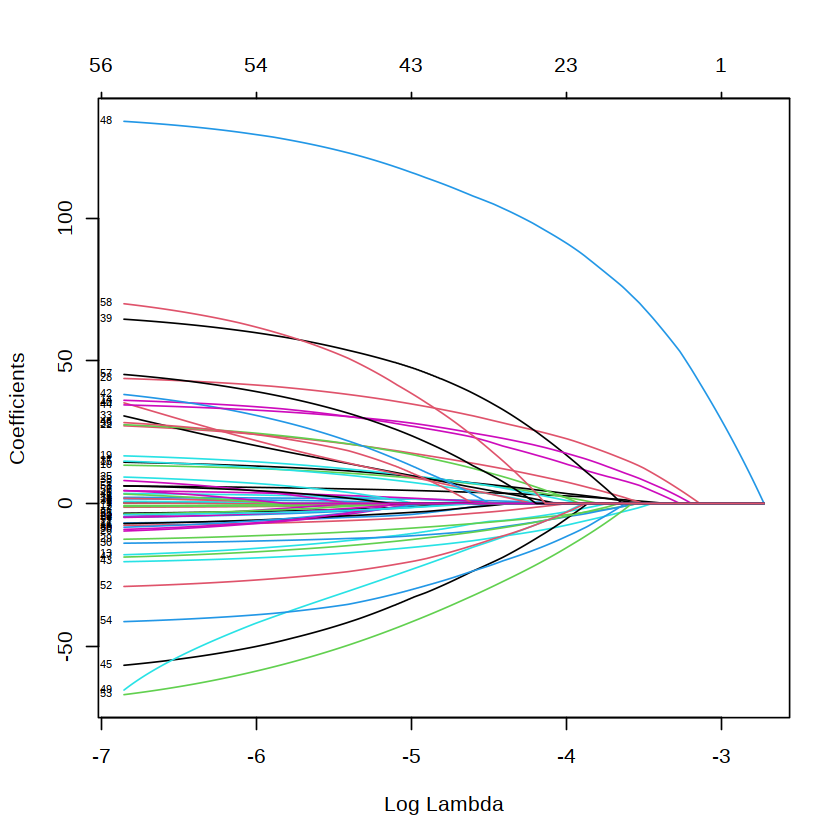

In [33]:
plot(f1,xvar="lambda", label=TRUE)

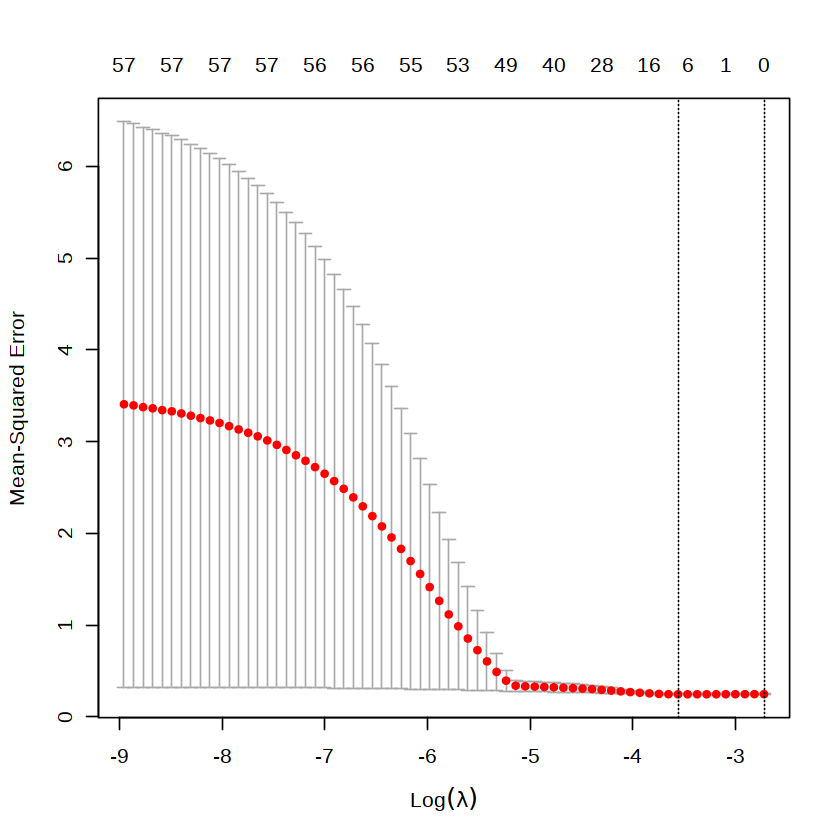

In [34]:
cvfit=cv.glmnet(x,y)

plot(cvfit)

In [35]:
cvfit$lambda.min#求出最小值

cvfit$lambda.1se#求出最小值一个标准误的λ值

[1] 0.02840049

[1] 0.06560882

In [36]:
l.coef2<-coef(cvfit$glmnet.fit,s=cvfit$lambda.min,exact= F)

l.coef1<-coef(cvfit$glmnet.fit,s=cvfit$lambda.1se,exact= F)

In [37]:
lassout= data.frame(id= c('y',rownames(lefdis_Species)), as.matrix(l.coef2))

In [38]:
#write.csv(as.matrix(l.coef1),file= '3.dif_micro/Combat_microeco/newanalysis/lasso.coef.lambda.1se.csv')
write.csv(lassout,file= '3.dif_micro/Combat_microeco/newanalysis/lasso.coef.lambda.min.csv')

In [39]:
head(bc,n=2)

,y,k__Bacteria.p__Proteobacteria.c__Gammaproteobacteria.o__Enterobacterales.f__Enterobacteriaceae.g__Escherichia.s__Escherichia.coli,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides.uniformis,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Prevotellaceae.g__Prevotella.s__Prevotella.copri.,k__Bacteria.p__Verrucomicrobia.c__Verrucomicrobiae.o__Verrucomicrobiales.f__Akkermansiaceae.g__Akkermansia.s__Akkermansia.muciniphila.,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruminococcus.s__Ruminococcus.bromii.,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides.eggerthii,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Rikenellaceae.g__Alistipes.s__Alistipes.putredinis.,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Bacteroidaceae.g__Bacteroides.s__Bacteroides.plebeius,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Eubacteriaceae.g__Eubacterium.s__Eubacterium.sp..CAG.202,⋯,k__Bacteria.p__Firmicutes.c__Tissierellia.o__Tissierellales.f__Peptoniphilaceae.g__Parvimonas.s__Parvimonas.micra,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Ruminococcaceae.g__Ruminococcus.s__Ruminococcus.sp..CAG.254,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Dialister.s__Dialister.succinatiphilus,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Tannerellaceae.g__Parabacteroides.s__Parabacteroides.goldsteinii.,k__Bacteria.p__Bacteroidetes.c__Bacteroidia.o__Bacteroidales.f__Prevotellaceae.g__Prevotella.s__Prevotella.sp..CAG.617,k__Bacteria.p__Proteobacteria.c__Alphaproteobacteria.o__Rhodospirillales.f__Rhodospirillaceae.g__Azospirillum.s__Azospirillum.sp..51_20,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Anaeroglobus.s__Anaeroglobus.geminatus,k__Bacteria.p__Firmicutes.c__Clostridia.o__Clostridiales.f__Clostridiaceae.g__Clostridium.s__Clostridium.sp..CAG.299,k__Bacteria.p__Synergistetes.c__Synergistia.o__Synergistales.f__Synergistaceae.g__Pyramidobacter.s__Pyramidobacter.piscolens,k__Bacteria.p__Firmicutes.c__Negativicutes.o__Veillonellales.f__Veillonellaceae.g__Megasphaera.s__Megasphaera.sp..
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SRR15372978,1,0.01810569,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.001018445,0,0
SRR15372967,1,0.01587066,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.000000000,0,0


In [43]:
ncol(bc)

[1] 59

In [52]:
library(pROC)
roclist= list()
aa= data.frame(t(feat.all[rownames(lefdis_Species),]),
               y= ifelse(meta[colnames(feat.all),]$response_bin=='responder',1,0)
               )

for(i in 1:58){
    res.roc=roc(aa$y,aa[,i],ci=TRUE,of="auc")
    ot= data.frame(id= rownames(lefdis_Species)[i],auc= res.roc$auc)
    roclist[[i]]=ot
}
rocout= do.call(rbind, roclist)


Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting leve

In [53]:
write.csv(rocout, '3.dif_micro/Combat_microeco/newanalysis/ROCoutForEachSpecies.csv')

In [ ]:
#VSOLassoBag

In [31]:
aa= meta
aa$y= ifelse(aa$response_bin=='responder',1,0)

In [32]:
library(SummarizedExperiment)
library(VSOLassoBag)
seobj=SummarizedExperiment(assays=feat.all[rownames(lefdis_Species),], colData=aa)

In [33]:
set.seed(1)
vlasoout= VSOLassoBag(ExpressionData = seobj, outcomevariable = 'y', 
            bootN = 100, a.family = "binomial", bagFreq.sigMethod = "PST", do.plot = TRUE)


Fri Mar  3 15:45:10 2023 -- INIT process completed, start analyzing  
Fri Mar  3 15:45:10 2023 -- start calculating observed frequency  
2023-03-03 15:46:44--Bagging finished ... 
Fri Mar  3 15:46:45 2023 -- Using Non-permutation method to determine a cutoff point  
Using Parametric Statistical Test... 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Fri Mar  3 15:46:45 2023 -- Done 


In [38]:
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/newanalysis/VSOLassoBag/"))
if(!dir.exists(outDir)) dir.create(outDir,recursive=TRUE)
write.csv(vlasoout$results, file= paste0(outDir, '/VSOLassoBag_out_comparedResponse.csv'))

In [36]:
head(vlasoout$results)

,variable,Frequency,P.value,P.adjust
,<chr>,<dbl>,<dbl>,<dbl>
33,k__Bacteria|p__Bacteria phylum incertae sedis|c__Bacteria class incertae sedis|o__Bacteria order incertae sedis|f__Bacteria fam. incertae sedis|g__Bacteria gen. incertae sedis|s__bacterium LF-3,52,1.037032e-36,4.044425e-35
11,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Anaerostipes|s__Anaerostipes hadrus,27,1.369513e-11,2.670550e-10
37,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella sp. CAG:617,19,3.880007e-06,5.044008e-05
10,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Blautia|s__Blautia massiliensis,17,5.117378e-05,4.989444e-04
20,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Veillonellales|f__Veillonellaceae|g__Dialister|s__Dialister invisus,15,5.240823e-04,3.406535e-03
23,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiaceae|g__Clostridium|s__Clostridium sp.,15,5.240823e-04,3.406535e-03


# new survival analysis

In [57]:
load('5.survival_micro/selectedOTUresults//otu_clin_merged.RData')

In [58]:
demon= demon[,!grepl(pattern = 'OTU',colnames(demon))]

In [59]:
head(demon)

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<fct>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.107166,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,responder
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.351085,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,responder
SRR15372934,LUM_249,SRR15372934,France,64,23.0,female,1.216305,1,1,yes,⋯,NA,NA,NA,NA,NA,NA,23.0,lean,SRR15372934,non_responder
SRR15372933,LUM_250,SRR15372933,France,68,17.9,female,13.379356,1,1,no,⋯,NA,NA,NA,NA,NA,NA,17.9,lean,SRR15372933,responder
SRR15372932,LUM_251,SRR15372932,France,61,26.5,male,43.754109,0,1,yes,⋯,NA,NA,NA,NA,NA,NA,26.5,overweight,SRR15372932,responder
SRR15372931,LUM_252,SRR15372931,France,60,18.5,female,4.372124,1,1,no,⋯,NA,NA,NA,NA,NA,NA,18.5,lean,SRR15372931,non_responder


In [60]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [61]:
sp_m= feat.all[rownames(lefdis_Species),] %>% t %>% as.data.frame
colnames(sp_m)= sapply(stringr::str_split(colnames(sp_m), "[|]"), `[`, 7)

In [62]:
dim(sp_m);sp_m[1:5,1:4]

[1] 782  58

,s__Escherichia coli,s__Bacteroides uniformis,s__Prevotella copri,s__Akkermansia muciniphila
,<dbl>,<dbl>,<dbl>,<dbl>
SRR15372978,1.810569e-02,0.000000000,0,0.000000000
SRR15372967,1.587066e-02,0.000000000,0,0.000000000
SRR15372934,6.008171e-04,0.016462389,0,0.008050949
SRR15372933,1.242390e-03,0.150701951,0,0.000000000
SRR15372932,2.626257e-05,0.003965649,0,0.007721197


In [63]:
all(rownames(demon) %in% rownames(sp_m))

[1] TRUE

In [64]:
demon= cbind(sp_m[rownames(demon), ], demon)

In [65]:
dim(demon)

[1] 401  90

In [66]:
summary(demon$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.00   59.00   66.00   65.23   72.00   92.00 

In [67]:
colnames(demon)=gsub(' ','_', colnames(demon))
colnames(demon)=gsub('[:]','_', colnames(demon))
colnames(demon)=gsub('[-]','_', colnames(demon))

In [68]:
table(demon$Study)


   Derosa_etal_NM_2022 McCulloch_etal_NM_2022 
                   338                     63 

In [144]:
tmplist= list()
library(survival)
library(survminer)
for(i in c(1:58)){
    #find the cut-off value
ss=Surv(demon$OS_time, demon$OS_status)
res.cut <- surv_cutpoint(demon, time = "OS_time", event = "OS_status",minprop = 0.01,
                         variables = colnames(demon)[i])
res.cat <- surv_categorize(res.cut)
colnames(res.cat)[3]='group'
res.cat$group= factor(res.cat$group, levels= c('low','high'))
head(res.cat)
dim(res.cat)
    #calculate HR and p value
  my.surv <- Surv(res.cat$OS_time,res.cat$OS_status)
  #m=coxph(my.surv ~ group+ age_bin+gender+disease, data =  survival_dat)
  m=coxph(my.surv ~ group, data =  res.cat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  rownames(tmp)= colnames(demon)[i]
  tmplist[[i]]= tmp
}

In [145]:
res_out= do.call(rbind, tmplist) %>% as.data.frame
res_out= res_out[order(res_out$p, decreasing = F),]

In [ ]:
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/newanalysis/Cox/"))
if(!dir.exists(outDir)) dir.create(outDir,recursive=TRUE)

In [147]:
write.csv(res_out, paste0(outDir, 'univariate_cox_out.csv'))

In [69]:
head(demon)

,s__Escherichia_coli,s__Bacteroides_uniformis,s__Prevotella_copri_,s__Akkermansia_muciniphila_,s__Ruminococcus_bromii_,s__Bacteroides_eggerthii,s__Alistipes_putredinis_,s__Bacteroides_plebeius,s__Eubacterium_sp._CAG_202,s__Parabacteroides_merdae_,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<fct>
SRR15372978,1.810569e-02,0.000000000,0,0.000000000,0.000000e+00,0,0.0000000000,0,0.0000000000,0.0000000000,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,responder
SRR15372967,1.587066e-02,0.000000000,0,0.000000000,0.000000e+00,0,0.0000000000,0,0.0000000000,0.0000000000,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,responder
SRR15372934,6.008171e-04,0.016462389,0,0.008050949,0.000000e+00,0,0.0000000000,0,0.0001201634,0.0001201634,⋯,NA,NA,NA,NA,NA,NA,23.0,lean,SRR15372934,non_responder
SRR15372933,1.242390e-03,0.150701951,0,0.000000000,1.180271e-02,0,0.0007454342,0,0.0000000000,0.0073301031,⋯,NA,NA,NA,NA,NA,NA,17.9,lean,SRR15372933,responder
SRR15372932,2.626257e-05,0.003965649,0,0.007721197,3.676760e-04,0,0.0059616041,0,0.0312787247,0.0016808047,⋯,NA,NA,NA,NA,NA,NA,26.5,overweight,SRR15372932,responder
SRR15372931,5.748228e-03,0.116210002,0,0.000000000,9.580379e-05,0,0.0003832152,0,0.0577696877,0.0033531328,⋯,NA,NA,NA,NA,NA,NA,18.5,lean,SRR15372931,non_responder


In [77]:
tmplist= list()
library(survival)
library(survminer)
for(i in c(1:58)){
    #find the cut-off value
ss=Surv(demon$OS_time, demon$OS_status)
res.cut <- surv_cutpoint(demon, time = "OS_time", event = "OS_status",minprop = 0.01,
                         variables = colnames(demon)[i])
res.cat <- surv_categorize(res.cut)
colnames(res.cat)[3]='group'
res.cat$group= factor(res.cat$group, levels= c('low','high'))
colnames(res.cat)[3]=colnames(demon)[i]
tmplist[[i]]= data.frame(group= res.cat[,-c(1:2)])
}
datagroup= do.call(cbind, tmplist)
colnames(datagroup)= colnames(demon)[1:58]
rownames(datagroup)=rownames(demon)

In [115]:
cox.data= datagroup

cox_results <- apply(cox.data , 2, function(values1){
  group=values1
  survival_dat <- data.frame(group=group,
                             demon[,c('OS_time','OS_status','age_bin','gender','disease')],
                             stringsAsFactors = F)
  survival_dat$group= factor(survival_dat$group, levels = c('low','high'))
  library(survival)
  my.surv <- Surv(survival_dat$OS_time,survival_dat$OS_status)
  m=coxph(my.surv ~ group+age_bin+gender+disease, data =  survival_dat)
  #m=coxph(my.surv ~ group, data =  survival_dat)
  beta <- coef(m)
  se <- sqrt(diag(vcov(m)))
  HR <- exp(beta)
  HRse <- HR * se
  
  #summary(m)
  tmp <- round(cbind(coef = beta, se = se, z = beta/se, p = 1 - pchisq((beta/se)^2, 1),
                     HR = HR, HRse = HRse,
                     HRz = (HR - 1) / HRse, HRp = 1 - pchisq(((HR - 1)/HRse)^2, 1),
                     HRCILL = exp(beta - qnorm(.975, 0, 1) * se),
                     HRCIUL = exp(beta + qnorm(.975, 0, 1) * se)), 3)
  return(tmp[1,])
  
})


In [121]:
write.csv(t(cox_results),file= paste0(outDir, '/multiCox_bestCutBased.csv'))

In [138]:
forelist= list()
myplots=list()
multimodellist=list()
tarname=colnames(demon)[1:58]
for(i in 1:58){
    
ss=Surv(demon$OS_time, demon$OS_status)
res.cut <- surv_cutpoint(demon, time = "OS_time", event = "OS_status",minprop = 0.01,
                         variables = tarname[i])
res.cat <- surv_categorize(res.cut)
colnames(res.cat)[3]='group'
res.cat$group= factor(res.cat$group, levels= c('low','high'))
head(res.cat)
res.cat= cbind(res.cat, meta[rownames(res.cat),])
##
  my.surv=Surv(res.cat$OS_time,res.cat$OS_status)
  multicox=coxph(my.surv ~ group, data =  res.cat)
  #######
  cc=summary(multicox)
  cc
  HR <- round(cc$coefficients[,2],2)[1]
  pvalue <- round(cc$coefficients[,5],4)[1]
  LCI <- round(cc$conf.int[,3],2)[1]
  UCI <- round(cc$conf.int[,4],2)[1]
  CI95 <- paste(LCI,'-',UCI)
#
fit2<- survfit(Surv(OS_time, OS_status) ~ group, data = res.cat )
  g1= ggsurvplot(fit2, data = res.cat,
                 #title ='TCGA_LUAD_cluster1_signature_increasing_with_age',
                 title =paste(tarname[i],'\n',
                              'cutoff: ', summary(res.cut)$cutpoint,'\n',
                              "HR","=", HR," (",CI95, ")","\n","logrank","P = ", pvalue, sep=""),
                 pval = TRUE, pval.method = TRUE, # Add p-value &  method name
                 surv.median.line = "hv",            # Add median survival lines
                 #legend.title = "ACE",               # Change legend titles
                 #legend.labs = c("1","2"),  # Change legend labels
                 #palette = c("#00AFBB","#756bb1","#E69F00","#d73027"),  # Use JCO journal color palette,
                 #palette =c("#d73027","#E69F00"),
                 legend='right',
                 #palette = agecol[6:1],
                 palette= c( "#92c5de", "#ca0020", "#f4a582","#0571b0"),
                 risk.table = TRUE,                  # Add No at risk table
                 cumevents = F,                   # Add cumulative No of events table
                 tables.height = 0.15,               # Specify tables height
                 tables.theme = theme_cleantable(),  # Clean theme for tables
                 tables.y.text = FALSE,             # Hide tables y axis text
                 #ylab="Disease specific survival probability",
                 ylab="Overall survival probability",
                 #ylab="progression-free interval probability",
                 #ylab="disease-free interval probability",
                 xlab="Time(Months)"
  )
  myplots[[i]]= g1
  #
  codata=  data.frame(group= res.cat$group, demon[,c('OS_time','OS_status','age_bin','gender','disease')])
  my.surv=Surv(codata$OS_time,codata$OS_status)
  multimodel=coxph(my.surv ~ group+ age_bin+gender+disease, data =  codata)
  #multimodel=coxph(my.surv ~ group+ age_bin+gender+bmi_bin, data =  codata)
  #multimodel[[i]]=multimodel
  g2= ggforest(multimodel, data = codata)
  forelist[[i]]= g2
}

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text(

In [129]:
class(myplots)

[1] "list"

In [165]:
for(i in 1:58){
pdf(paste0(outDir,tarname[i],'_survival_bestCut.pdf'),width = 5,height = 5)
print(myplots[[i]])
dev.off()
pdf(paste0(paste0(outDir,tarname[i], '_forest_bestCut.pdf')),width =7,height = 4)
print(forelist[[i]])
dev.off()   
    
}

In [149]:
###
###
head(lefdis_Species);dim(lefdis_Species)

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Comparison,Taxa,Method,Group,LDA,P.unadj,P.adj,Significance
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli,old - young,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Escherichia|s__Escherichia coli,LEfSe,old,3.654566,0.025524263,0.2296699,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides uniformis,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,LEfSe,old,3.640768,0.014276931,0.1738576,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella copri,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella,s__Prevotella copri,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Prevotellaceae|g__Prevotella|s__Prevotella copri,LEfSe,old,3.597704,0.130836612,0.4654240,ns
k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia muciniphila,k__Bacteria,p__Verrucomicrobia,c__Verrucomicrobiae,o__Verrucomicrobiales,f__Akkermansiaceae,g__Akkermansia,s__Akkermansia muciniphila,old - young,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia muciniphila,LEfSe,old,3.358380,0.153577037,0.4933731,ns
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcus|s__Ruminococcus bromii,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Ruminococcus,s__Ruminococcus bromii,old - young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcus|s__Ruminococcus bromii,LEfSe,young,3.335379,0.109290763,0.4482756,ns
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides eggerthii,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Bacteroidaceae,g__Bacteroides,s__Bacteroides eggerthii,old - young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides eggerthii,LEfSe,old,3.303704,0.006483544,0.1107065,ns


[1] 58 15

In [151]:
write.csv(cbind(lefdis_Species,t(cox_results) ),file= paste0(outDir, 'lefdis_species_mulcox.csv'))

In [153]:
aaa=t(cox_results) %>% as.data.frame
aaa$type= rownames(aaa)
head(aaa,n=2)

,coef,se,z,p,HR,HRse,HRz,HRp,HRCILL,HRCIUL,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
s__Escherichia_coli,0.609,0.147,4.149,0.000,1.838,0.270,3.108,0.002,1.379,2.450,s__Escherichia_coli
s__Bacteroides_uniformis,0.324,0.148,2.193,0.028,1.383,0.205,1.873,0.061,1.035,1.849,s__Bacteroides_uniformis


In [161]:
pdf(paste0(outDir, 'multiple_HR_plot.pdf'),width = 10,height = 10)
ggplot(aaa[order(nrow(aaa):1),], aes( type,HR, colour = type)) + 
  geom_pointrange(aes(ymin = HRCILL, ymax = HRCIUL),fatten = 2)+
  #facet_grid(. ~ endpoint)+
  #scale_fill_manual(values=cbPalette)+ # Boxplot fill color
  #scale_color_manual(values = cbPalette)+
  #theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ylab("Hazard ratio")+ggtitle("Multi Cox regression")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1),legend.position="none",
        # Hide panel borders and remove grid lines
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        # Change axis line
        axis.line = element_line(colour = "black"),
        #panel.border = element_blank(),
        panel.background = element_blank()
        )+coord_flip()+
  geom_hline(yintercept=1, linetype="dashed", color = "black")#+scale_y_continuous(breaks=c(0,1,2,3, 25))
dev.off()

png 
  2

In [4]:
# survival for RFscore
#
RFscore= read.table('Training_RF_Prob_58Featurebased.txt',header=T, sep='\t')

In [5]:
head(RFscore);colnames(RFscore)[1]='response01'

,response,response2,age,RF16_prob
,<int>,<chr>,<dbl>,<dbl>
1,1,responder,43,0.6944952
2,1,responder,56,0.4378830
3,0,nonresponder,64,0.2543503
4,1,responder,68,0.7594328
5,1,responder,61,0.7948746
6,0,nonresponder,60,0.1801614


In [6]:
clin= read.csv('3.dif_micro/Combat_microeco/newanalysis/data_allFeature.csv',header=T, row.names = 1)

In [7]:
clin=clin[,1:32]

In [61]:
statrf= cbind(RFscore, clin)

In [62]:
unique(statrf$Study)

[1] "Derosa_etal_NM_2022"           "Lee_etal_NM_2022"             
[3] "Routy_etal_Science_2017.NSCLC" "Routy_etal_Science_2017.RCC"  
[5] "McCulloch_etal_NM_2022"

In [63]:
statrf= subset(statrf, Study=='Derosa_etal_NM_2022')

,OS_time,OS_status,group
,<dbl>,<dbl>,<fct>
SRR15372978,47.107166,0,high
SRR15372967,46.351085,0,low
SRR15372934,1.216305,1,low
SRR15372933,13.379356,1,high
SRR15372932,43.754109,0,high
SRR15372931,4.372124,1,low


Call:
coxph(formula = my.surv ~ group, data = res.cat)

  n= 338, number of events= 177 

            coef exp(coef) se(coef)      z Pr(>|z|)    
grouphigh -1.865     0.155    0.176 -10.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
grouphigh     0.155      6.453    0.1097    0.2188

Concordance= 0.75  (se = 0.013 )
Likelihood ratio test= 133.5  on 1 df,   p=<2e-16
Wald test            = 112.2  on 1 df,   p=<2e-16
Score (logrank) test = 143.4  on 1 df,   p=<2e-16


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Call:
coxph(formula = my.surv ~ group + age_bin + gender, data = codata)

  n= 338, number of events= 177 

                   coef  exp(coef)   se(coef)       z Pr(>|z|)    
grouphigh    -1.8646004  0.1549581  0.1763957 -10.571   <2e-16 ***
age_binyoung -0.0021658  0.9978365  0.1649964  -0.013    0.990    
gendermale   -0.0008097  0.9991906  0.1631507  -0.005    0.996    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
grouphigh       0.1550      6.453    0.1097     0.219
age_binyoung    0.9978      1.002    0.7221     1.379
gendermale      0.9992      1.001    0.7257     1.376

Concordance= 0.746  (se = 0.017 )
Likelihood ratio test= 133.5  on 3 df,   p=<2e-16
Wald test            = 112.2  on 3 df,   p=<2e-16
Score (logrank) test = 143.4  on 3 df,   p=<2e-16


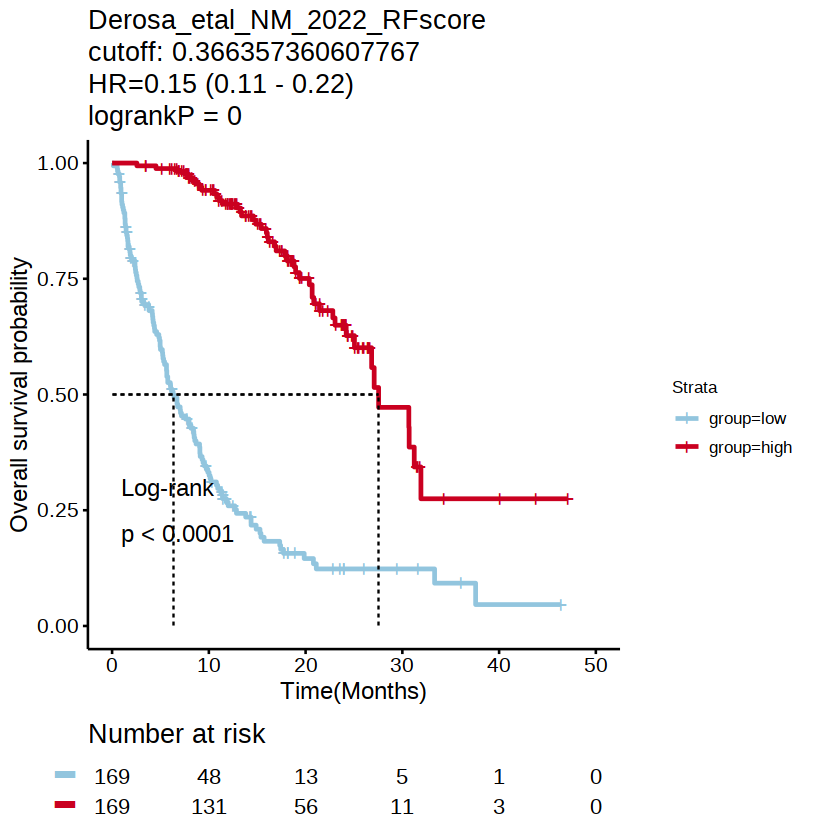

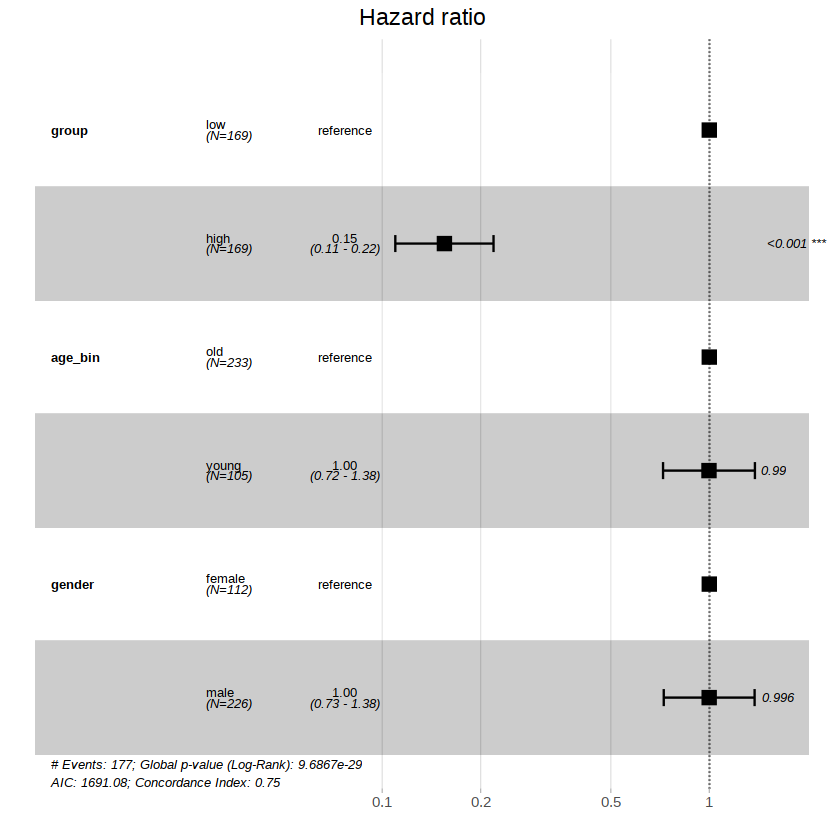

In [76]:
library(survminer)
library(survival)
statrf= cbind(RFscore, clin)
statrf= subset(statrf, Study=='Derosa_etal_NM_2022')

ss=Surv(statrf$OS_time, statrf$OS_status)
res.cut <- surv_cutpoint(statrf, time = "OS_time", event = "OS_status",minprop = 0.01,
                         variables = 'RF16_prob')
res.cat <- surv_categorize(res.cut)
colnames(res.cat)[3]='group'

res.cat$group=ifelse(statrf$RF16_prob > median(statrf$RF16_prob), 'high','low')
#res.cat$group= paste(res.cat$group, ifelse(demon$age>60, 'old','young'),sep = '_')
res.cat$group= factor(res.cat$group, levels= c('low','high'))
head(res.cat)
res.cat= cbind(res.cat, statrf[rownames(res.cat),])
##
  my.surv=Surv(res.cat$OS_time,res.cat$OS_status)
  multicox=coxph(my.surv ~ group, data =  res.cat)
  #######
  cc=summary(multicox)
  cc
  HR <- round(cc$coefficients[,2],2)[1]
  pvalue <- round(cc$coefficients[,5],4)[1]
  LCI <- round(cc$conf.int[,3],2)[1]
  UCI <- round(cc$conf.int[,4],2)[1]
  CI95 <- paste(LCI,'-',UCI)
#
fit2<- survfit(Surv(OS_time, OS_status) ~ group, data = res.cat )
  g1= ggsurvplot(fit2, data = res.cat,
                 #title ='TCGA_LUAD_cluster1_signature_increasing_with_age',
                 title =paste('Derosa_etal_NM_2022_RFscore','\n',
                              'cutoff: ', summary(res.cut)$cutpoint,'\n',
                              "HR","=", HR," (",CI95, ")","\n","logrank","P = ", pvalue, sep=""),
                 pval = TRUE, pval.method = TRUE, # Add p-value &  method name
                 surv.median.line = "hv",            # Add median survival lines
                 #legend.title = "ACE",               # Change legend titles
                 #legend.labs = c("1","2"),  # Change legend labels
                 #palette = c("#00AFBB","#756bb1","#E69F00","#d73027"),  # Use JCO journal color palette,
                 #palette =c("#d73027","#E69F00"),
                 legend='right',
                 #palette = agecol[6:1],
                 palette= c( "#92c5de", "#ca0020", "#f4a582","#0571b0"),
                 risk.table = TRUE,                  # Add No at risk table
                 cumevents = F,                   # Add cumulative No of events table
                 tables.height = 0.15,               # Specify tables height
                 tables.theme = theme_cleantable(),  # Clean theme for tables
                 tables.y.text = FALSE,             # Hide tables y axis text
                 #ylab="Disease specific survival probability",
                 ylab="Overall survival probability",
                 #ylab="progression-free interval probability",
                 #ylab="disease-free interval probability",
                 xlab="Time(Months)"
  )
g1
codata=  data.frame(group= res.cat$group, statrf[,c('OS_time','OS_status','age_bin','gender','disease')])
my.surv=Surv(codata$OS_time,codata$OS_status)
#multimodel=coxph(my.surv ~ group+ age_bin+gender+disease, data =  codata)
multimodel=coxph(my.surv ~ group+ age_bin+gender, data =  codata)
summary(multimodel)
#multimodel=coxph(my.surv ~ group+ age_bin+gender+bmi_bin, data =  codata)
#multimodel[[i]]=multimodel
g2= ggforest(multimodel, data = codata)
#pdf(paste0('3.dif_micro/Combat_microeco/newanalysis/forest_RFscore.pdf'),width =7,height = 4)
g2
#dev.off() 

,OS_time,OS_status,group
,<dbl>,<dbl>,<fct>
SRR16168983,166,1,low
SRR16168966,1229,1,low
SRR16168936,1437,0,high
SRR16168985,1386,0,high
SRR16168909,600,1,high
SRR16168949,1448,0,high


Call:
coxph(formula = my.surv ~ group, data = res.cat)

  n= 63, number of events= 28 

             coef exp(coef) se(coef)      z Pr(>|z|)    
grouphigh -1.5076    0.2214   0.4392 -3.432 0.000598 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
grouphigh    0.2214      4.516   0.09363    0.5238

Concordance= 0.681  (se = 0.039 )
Likelihood ratio test= 13.99  on 1 df,   p=2e-04
Wald test            = 11.78  on 1 df,   p=6e-04
Score (logrank) test = 14.08  on 1 df,   p=2e-04


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


Call:
coxph(formula = my.surv ~ group + age_bin + gender, data = codata)

  n= 63, number of events= 28 

                 coef exp(coef) se(coef)      z Pr(>|z|)    
grouphigh    -1.49529   0.22418  0.44010 -3.398  0.00068 ***
age_binyoung  0.07026   1.07278  0.46386  0.151  0.87962    
gendermale    0.18158   1.19911  0.44542  0.408  0.68352    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

             exp(coef) exp(-coef) lower .95 upper .95
grouphigh       0.2242     4.4606   0.09462    0.5312
age_binyoung    1.0728     0.9322   0.43218    2.6629
gendermale      1.1991     0.8339   0.50086    2.8708

Concordance= 0.694  (se = 0.043 )
Likelihood ratio test= 14.16  on 3 df,   p=0.003
Wald test            = 11.94  on 3 df,   p=0.008
Score (logrank) test = 14.24  on 3 df,   p=0.003


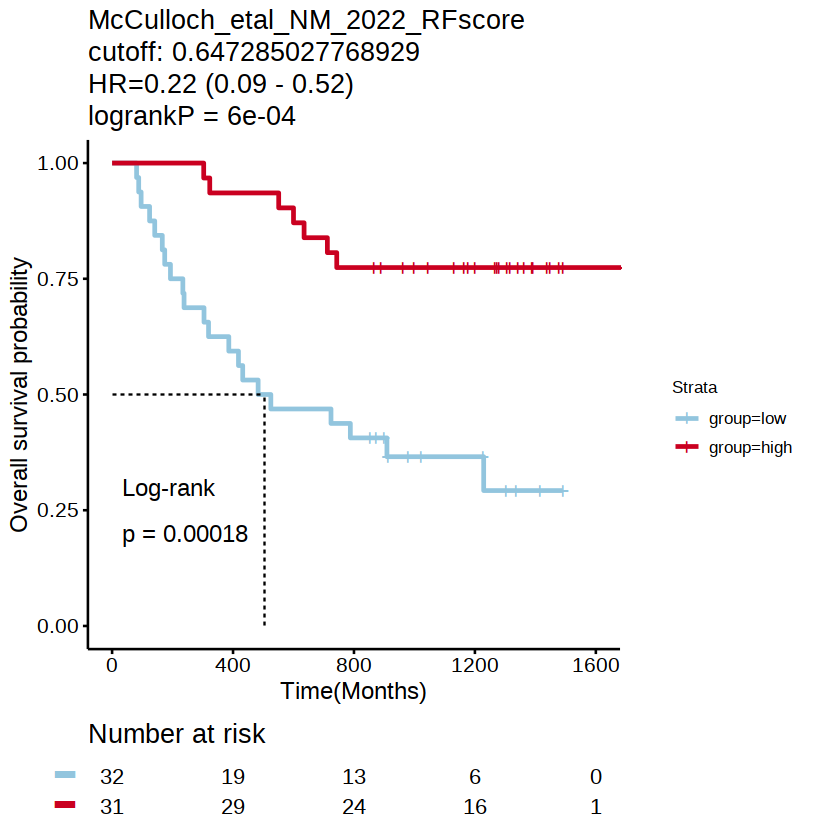

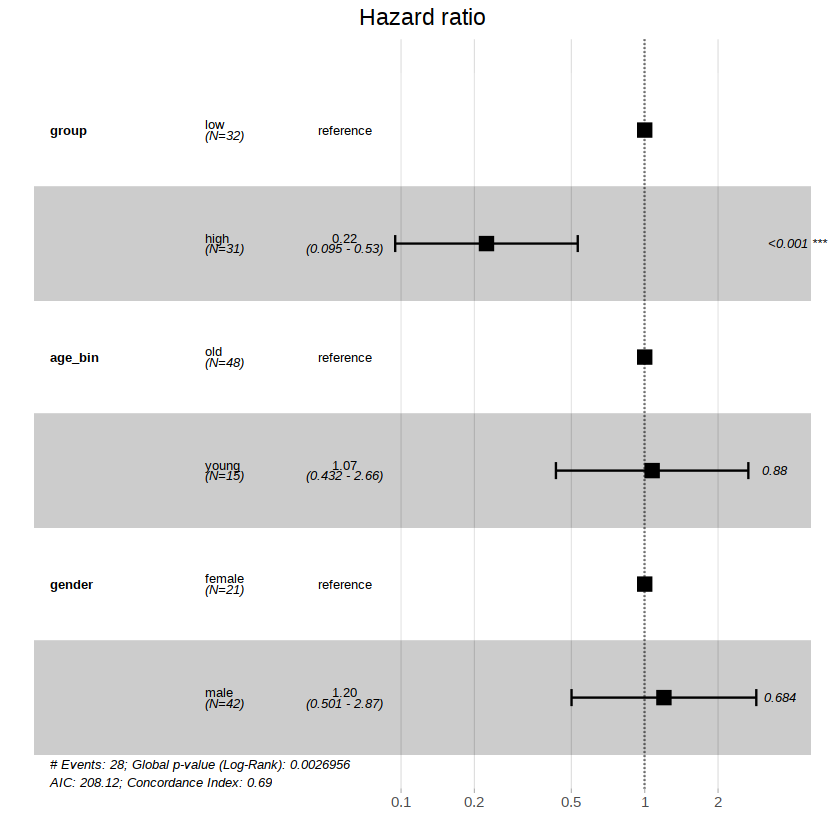

In [77]:
library(survminer)
library(survival)
statrf= cbind(RFscore, clin)
statrf= subset(statrf, Study=='McCulloch_etal_NM_2022')

ss=Surv(statrf$OS_time, statrf$OS_status)
res.cut <- surv_cutpoint(statrf, time = "OS_time", event = "OS_status",minprop = 0.01,
                         variables = 'RF16_prob')
res.cat <- surv_categorize(res.cut)
colnames(res.cat)[3]='group'

res.cat$group=ifelse(statrf$RF16_prob > median(statrf$RF16_prob), 'high','low')
#res.cat$group= paste(res.cat$group, ifelse(demon$age>60, 'old','young'),sep = '_')
res.cat$group= factor(res.cat$group, levels= c('low','high'))
head(res.cat)
res.cat= cbind(res.cat, statrf[rownames(res.cat),])
##
  my.surv=Surv(res.cat$OS_time,res.cat$OS_status)
  multicox=coxph(my.surv ~ group, data =  res.cat)
  #######
  cc=summary(multicox)
  cc
  HR <- round(cc$coefficients[,2],2)[1]
  pvalue <- round(cc$coefficients[,5],4)[1]
  LCI <- round(cc$conf.int[,3],2)[1]
  UCI <- round(cc$conf.int[,4],2)[1]
  CI95 <- paste(LCI,'-',UCI)
#
fit2<- survfit(Surv(OS_time, OS_status) ~ group, data = res.cat )
g3= ggsurvplot(fit2, data = res.cat,
                 #title ='TCGA_LUAD_cluster1_signature_increasing_with_age',
                 title =paste('McCulloch_etal_NM_2022_RFscore','\n',
                              'cutoff: ', summary(res.cut)$cutpoint,'\n',
                              "HR","=", HR," (",CI95, ")","\n","logrank","P = ", pvalue, sep=""),
                 pval = TRUE, pval.method = TRUE, # Add p-value &  method name
                 surv.median.line = "hv",            # Add median survival lines
                 #legend.title = "ACE",               # Change legend titles
                 #legend.labs = c("1","2"),  # Change legend labels
                 #palette = c("#00AFBB","#756bb1","#E69F00","#d73027"),  # Use JCO journal color palette,
                 #palette =c("#d73027","#E69F00"),
                 legend='right',
                 #palette = agecol[6:1],
                 palette= c( "#92c5de", "#ca0020", "#f4a582","#0571b0"),
                 risk.table = TRUE,                  # Add No at risk table
                 cumevents = F,                   # Add cumulative No of events table
                 tables.height = 0.15,               # Specify tables height
                 tables.theme = theme_cleantable(),  # Clean theme for tables
                 tables.y.text = FALSE,             # Hide tables y axis text
                 #ylab="Disease specific survival probability",
                 ylab="Overall survival probability",
                 #ylab="progression-free interval probability",
                 #ylab="disease-free interval probability",
                 xlab="Time(Months)"
  )
g3
codata=  data.frame(group= res.cat$group, statrf[,c('OS_time','OS_status','age_bin','gender','disease')])
my.surv=Surv(codata$OS_time,codata$OS_status)
#multimodel=coxph(my.surv ~ group+ age_bin+gender+disease, data =  codata)
multimodel=coxph(my.surv ~ group+ age_bin+gender, data =  codata)
summary(multimodel)
#multimodel=coxph(my.surv ~ group+ age_bin+gender+bmi_bin, data =  codata)
#multimodel[[i]]=multimodel
g4= ggforest(multimodel, data = codata)
#pdf(paste0('3.dif_micro/Combat_microeco/newanalysis/forest_RFscore.pdf'),width =7,height = 4)
g4
#dev.off() 

In [78]:
pdf(paste0('3.dif_micro/Combat_microeco/newanalysis/survival_RFscore.pdf'),width =7,height = 7)
g1
g2
g3
g4
dev.off()

png 
  2

In [8]:
head(feat.all)

,SRR15372978,SRR15372967,SRR15372934,SRR15372933,SRR15372932,SRR15372931,SRR15372929,SRR15372927,SRR15372925,SRR15372924,⋯,SRR16168899,SRR16168904,SRR16168914,SRR16168918,SRR16168894,SRR16168910,SRR16168896,SRR16168900,SRR16168902,SRR16168913
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales fam. incertae sedis|g__Clostridiales gen. incertae sedis|s__Clostridiales species incertae sedis,0.2597035193,0.2279739,0.17087239,0.044229097,0.604616960,0.070128377,0.645377558,0.0260860940,0.0085030208,0.0058161351,⋯,0.017712812,0.0016811098,9.198908e-06,2.128518e-02,0.0542745991,8.603795e-03,0.1010213466,0.0746282974,0.2766355140,5.274648e-02
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes species incertae sedis,0.0000000000,0.0000000,0.00000000,0.001366629,0.001496967,0.471163058,0.005057633,0.0003967467,0.0000000000,0.0001313321,⋯,0.000000000,0.0008904066,0.000000e+00,9.376250e-03,0.0007590853,6.409301e-06,0.0122464785,0.0002158273,0.0003051688,2.695272e-05
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides dorei/vulgatus,0.0001131606,0.0000000,0.13073780,0.046589638,0.008377761,0.001437057,0.000000000,0.0266812140,0.1127769076,0.0023545966,⋯,0.119346518,0.0008627112,1.392449e-06,2.210777e-04,0.0042698548,1.363899e-05,0.0178291947,0.0135491607,0.0235742895,7.854024e-02
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcaceae gen. incertae sedis|s__Ruminococcaceae species incertae sedis,0.0376824714,0.0142391,0.06957462,0.018138899,0.011975733,0.020406208,0.013643849,0.0502876413,0.0004475274,0.0065384615,⋯,0.006018917,0.0005677554,8.244446e-07,9.641224e-04,0.0456400038,4.671099e-05,0.0025977379,0.0050599520,0.0049208468,2.113094e-01
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,0.0000000000,0.0000000,0.01646239,0.150701951,0.003965649,0.116210002,0.000000000,0.0077365602,0.1237413292,0.0048780488,⋯,0.017540843,0.0020383803,1.677050e-06,2.889175e-04,0.0739159313,8.921747e-06,0.0002742953,0.0128057554,0.0429143620,2.794998e-02
k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia species incertae sedis,0.0000000000,0.0000000,0.00000000,0.108460678,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.0000000000,⋯,0.000000000,0.0020425346,1.198321e-09,2.660382e-07,0.0000000000,1.025488e-07,0.2807493102,0.0000000000,0.0000381461,0.000000e+00


In [35]:
AF=colSums(feat.all[grepl('Alistipes finegoldii',rownames(feat.all)),]) %>% as.data.frame
colnames(AF)='AF'

In [58]:
stataf= data.frame(demon, AF=AF[rownames(demon), ])

In [59]:
table(demon$Study)


   Derosa_etal_NM_2022 McCulloch_etal_NM_2022 
                   338                     63 

In [60]:
#stataf= subset(stataf, Study=='Derosa_etal_NM_2022')
stataf= subset(stataf, Study=='McCulloch_etal_NM_2022')


In [61]:
dim(stataf)

[1] 63 91

In [62]:
library(survminer)
library(survival)
ss=Surv(stataf$OS_time, stataf$OS_status)
res.cut <- surv_cutpoint(stataf, time = "OS_time", event = "OS_status",minprop = 0.01,
                         variables = 'AF')
res.cat <- surv_categorize(res.cut)
colnames(res.cat)[3]='group'

#res.cat$group=ifelse(demon$s__Bacteroides_fragilis > 0, 'high','low')
#res.cat$group= paste(res.cat$group, ifelse(demon$age>60, 'old','young'),sep = '_')
res.cat$group= factor(res.cat$group, levels= c('low','high'))
head(res.cat)
res.cat= cbind(res.cat, meta[rownames(res.cat),])
##
  my.surv=Surv(res.cat$OS_time,res.cat$OS_status)
  multicox=coxph(my.surv ~ group, data =  res.cat)
  #######
  cc=summary(multicox)
  cc
  HR <- round(cc$coefficients[,2],2)[1]
  pvalue <- round(cc$coefficients[,5],4)[1]
  LCI <- round(cc$conf.int[,3],2)[1]
  UCI <- round(cc$conf.int[,4],2)[1]
  CI95 <- paste(LCI,'-',UCI)
#
fit2<- survfit(Surv(OS_time, OS_status) ~ group, data = res.cat )
  g1= ggsurvplot(fit2, data = res.cat,
                 #title ='TCGA_LUAD_cluster1_signature_increasing_with_age',
                 title =paste('s__Alistipes_finegoldii_','\n',
                              'cutoff: ', summary(res.cut)$cutpoint,'\n',
                              "HR","=", HR," (",CI95, ")","\n","logrank","P = ", pvalue, sep=""),
                 pval = TRUE, pval.method = TRUE, # Add p-value &  method name
                 surv.median.line = "hv",            # Add median survival lines
                 #legend.title = "ACE",               # Change legend titles
                 #legend.labs = c("1","2"),  # Change legend labels
                 #palette = c("#00AFBB","#756bb1","#E69F00","#d73027"),  # Use JCO journal color palette,
                 #palette =c("#d73027","#E69F00"),
                 legend='right',
                 #palette = agecol[6:1],
                 palette= c( "#92c5de", "#ca0020", "#f4a582","#0571b0"),
                 risk.table = TRUE,                  # Add No at risk table
                 cumevents = F,                   # Add cumulative No of events table
                 tables.height = 0.15,               # Specify tables height
                 tables.theme = theme_cleantable(),  # Clean theme for tables
                 tables.y.text = FALSE,             # Hide tables y axis text
                 #ylab="Disease specific survival probability",
                 ylab="Overall survival probability",
                 #ylab="progression-free interval probability",
                 #ylab="disease-free interval probability",
                 xlab="Time(Months)"
  )

,OS_time,OS_status,group
,<dbl>,<int>,<fct>
SRR16168983,5.533333,1,low
SRR16168966,40.966667,1,low
SRR16168936,47.900000,0,low
SRR16168985,46.200000,0,low
SRR16168909,20.000000,1,low
SRR16168949,48.266667,0,low


Call:
coxph(formula = my.surv ~ group, data = res.cat)

  n= 63, number of events= 28 

           coef exp(coef) se(coef)     z Pr(>|z|)   
grouphigh 2.075     7.966    0.761 2.727   0.0064 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
grouphigh     7.966     0.1255     1.792      35.4

Concordance= 0.536  (se = 0.025 )
Likelihood ratio test= 4.57  on 1 df,   p=0.03
Wald test            = 7.44  on 1 df,   p=0.006
Score (logrank) test = 10.51  on 1 df,   p=0.001


Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


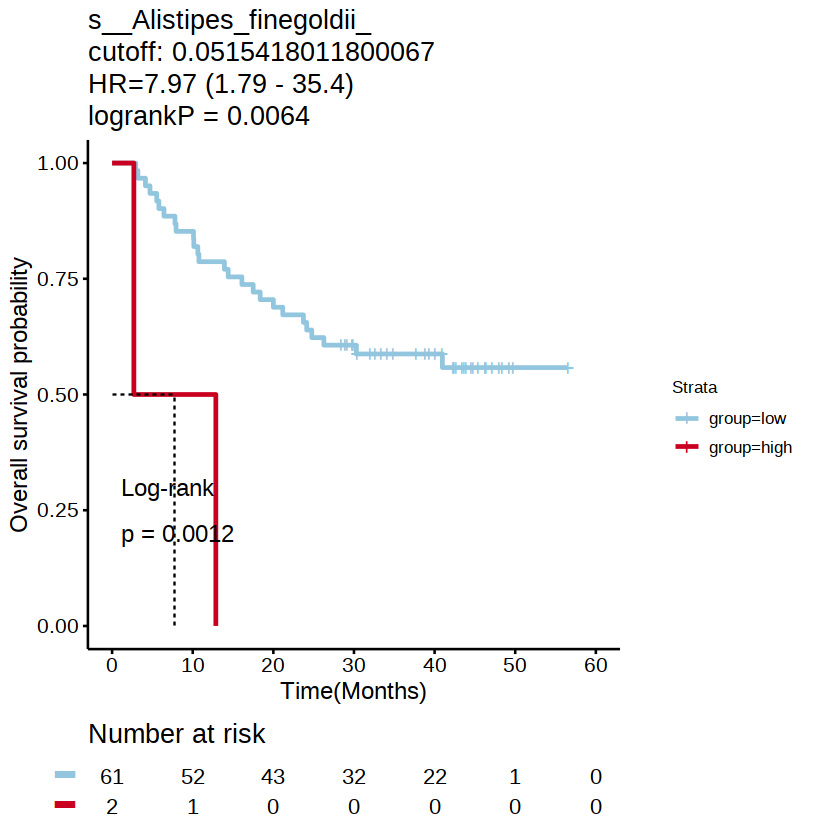

In [63]:
g1

In [ ]:
## do occupacy and specifity
rm(list=ls())
outDir <- file.path(paste0("3.dif_micro/Combat_microeco/newanalysis/"))
feat.all= read.csv('3.dif_micro/Combat_microeco/dataset_microeco_species_matrix.csv',header=T, row.names = 1)
meta= read.csv('3.dif_micro/Combat_microeco/dataset_microeco_meta_clin.csv',header=T, row.names=1)


In [5]:
feat.all[1:4,1:10]

,SRR15372978,SRR15372967,SRR15372934,SRR15372933,SRR15372932,SRR15372931,SRR15372929,SRR15372927,SRR15372925,SRR15372924
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales fam. incertae sedis|g__Clostridiales gen. incertae sedis|s__Clostridiales species incertae sedis,0.2597035193,0.2279739,0.17087239,0.044229097,0.604616960,0.070128377,0.645377558,0.0260860940,0.0085030208,0.0058161351
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes species incertae sedis,0.0000000000,0.0000000,0.00000000,0.001366629,0.001496967,0.471163058,0.005057633,0.0003967467,0.0000000000,0.0001313321
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides dorei/vulgatus,0.0001131606,0.0000000,0.13073780,0.046589638,0.008377761,0.001437057,0.000000000,0.0266812140,0.1127769076,0.0023545966
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcaceae gen. incertae sedis|s__Ruminococcaceae species incertae sedis,0.0376824714,0.0142391,0.06957462,0.018138899,0.011975733,0.020406208,0.013643849,0.0502876413,0.0004475274,0.0065384615


In [6]:
otu= data.frame(feat.all, Taxonomy= sapply(stringr::str_split(rownames(feat.all), "[|]"), `[`, 6))

In [8]:
head(meta,n=2);table(meta$Group)

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.10717,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.35108,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young



  old young 
  511   271 

In [10]:
group= meta

In [11]:
##计算各组样本中，OTU 的特异性（specificity）和占有率（occupancy）

Nindividuals_S <- rep(0, nrow(otu))
for (i in unique(group$Group)) {
	otu_group_i <- otu[ ,rownames(subset(group, Group == i))]
	Nindividuals_S <- Nindividuals_S + rowMeans(otu_group_i)  #计算 Nindividuals S
}

spec_occu <- NULL
for (i in unique(group$Group)) {
	otu_group_i <- otu[ ,rownames(subset(group, Group == i))]
	Nindividuals_SH <- apply(otu_group_i, 1, mean)  #计算 Nindividuals SH
	Specificity <- Nindividuals_SH / Nindividuals_S  #计算 Specificity
	Nsites_H <- ncol(otu_group_i)  #计算 Nsites H
	Nsites_SH <- apply(otu_group_i, 1, function(x) sum(x>0))  #计算 Nsites SH
	Occupancy <- Nsites_SH / Nsites_H  #计算 Occupancy
	spec_occu_group_i <- data.frame(Group = i, OTU = rownames(otu_group_i), Specificity = Specificity, Occupancy = Occupancy, Abundance_mean = rowMeans(otu_group_i), Taxonomy = otu$Taxonomy)
	spec_occu <- rbind(spec_occu, spec_occu_group_i)  #合并各组统计
}
head(spec_occu)  #该数据框包含各组中各 OTU 的名称、特异性、占有率、平均丰度、类群信息等


,Group,OTU,Specificity,Occupancy,Abundance_mean,Taxonomy
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales fam. incertae sedis|g__Clostridiales gen. incertae sedis|s__Clostridiales species incertae sedis,young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Clostridiales fam. incertae sedis|g__Clostridiales gen. incertae sedis|s__Clostridiales species incertae sedis,0.4866341,0.9889299,0.12066622,g__Clostridiales gen. incertae sedis
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes species incertae sedis,young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Rikenellaceae|g__Alistipes|s__Alistipes species incertae sedis,0.4985256,0.7490775,0.03096818,g__Alistipes
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides dorei/vulgatus,young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides dorei/vulgatus,0.4646436,0.9151292,0.02769379,g__Bacteroides
k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcaceae gen. incertae sedis|s__Ruminococcaceae species incertae sedis,young,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Ruminococcaceae gen. incertae sedis|s__Ruminococcaceae species incertae sedis,0.5420187,0.9741697,0.03357317,g__Ruminococcaceae gen. incertae sedis
k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,young,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides uniformis,0.4216528,0.8708487,0.02305759,g__Bacteroides
k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia species incertae sedis,young,k__Bacteria|p__Verrucomicrobia|c__Verrucomicrobiae|o__Verrucomicrobiales|f__Akkermansiaceae|g__Akkermansia|s__Akkermansia species incertae sedis,0.4411066,0.1586716,0.01813872,g__Akkermansia


In [15]:
#输出统计表格
outDir <- file.path("3.dif_micro/Combat_microeco/newanalysis/occupacy/")
if(!dir.exists(outDir)) dir.create(outDir,recursive=TRUE)
write.csv(spec_occu, paste0(outDir,'/spec_occu.csv'))


Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


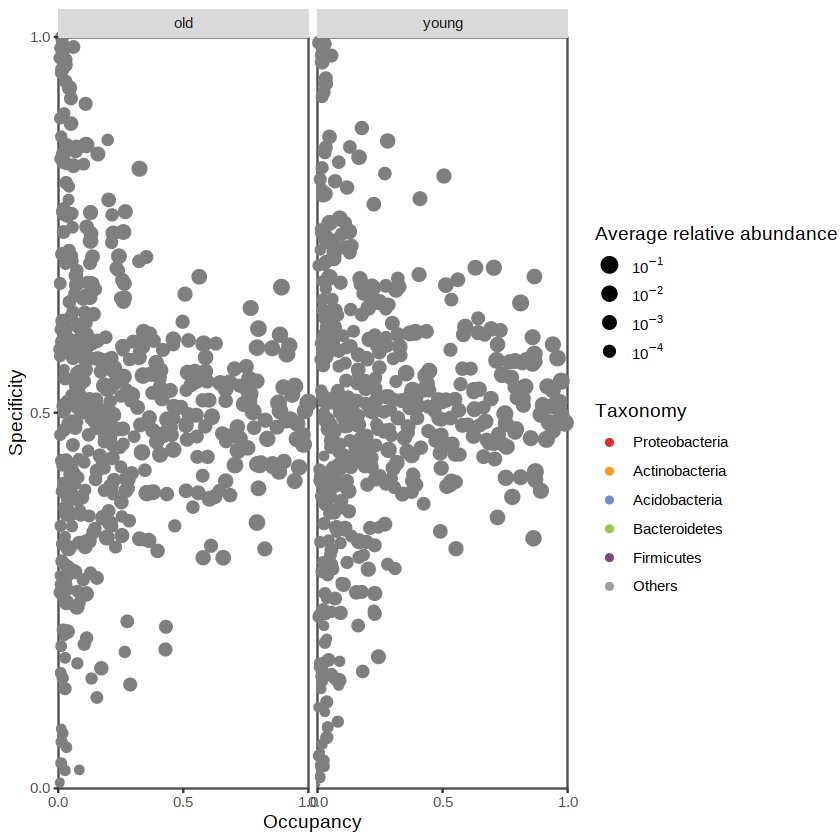

In [13]:
#绘制 SPEC-OCCU 图
library(ggplot2)
p <- ggplot(spec_occu, aes(Occupancy, Specificity)) +
geom_point(aes(size = log10(Abundance_mean), color = Taxonomy)) +
#geom_jitter(aes(size = log10(Abundance_mean), color = Taxonomy)) +  #如果觉得普通散点图中的点重叠严重不好看，可以仿照 Gweon et al (2021) 使用抖动点图来展示
scale_size(breaks = c(-1, -2, -3, -4), labels = c(expression(10^{-1}), expression(10^{-2}), expression(10^{-3}), expression(10^{-4})), range = c(0, 4)) +
scale_color_manual(values = c('#E7272E', '#F59D1F', '#768CC5', '#9BC648', '#794779', '#A19E9D'), limits = c('Proteobacteria', 'Actinobacteria', 'Acidobacteria', 'Bacteroidetes', 'Firmicutes', 'Others')) +
theme(panel.grid = element_blank(), panel.background = element_rect(fill = 'white', color = 'gray30'), legend.key = element_blank()) +
facet_wrap(~Group, ncol = 2) +
scale_x_continuous(breaks = c(0, 0.5, 1), expand = c(0, 0), limit = c(0, 1)) +
scale_y_continuous(breaks = c(0, 0.5, 1), expand = c(0, 0), limit = c(0, 1)) +
labs(x = 'Occupancy', y = 'Specificity', size = 'Average relative abundance', color = 'Taxonomy') +
coord_cartesian(clip = 'off')

p

In [ ]:
library(vegan)
permanova <- adonis(t() ~ group,
               data = meta, permutations=99, method = "bray")

In [9]:
library(indicspecies)
#https://jkzorz.github.io/2019/07/02/Indicator-species-analysis.html

Loading required package: permute



In [8]:
feat.all_adjusted[1:4,1:4]

,SRR15372978,SRR15372967,SRR15372934,SRR15372933
s__ Enterobacter sp. .[ref_mOTU_v3_00077],0,0,1,0
s__Klebsiella aerogenes.[ref_mOTU_v3_00084],0,0,0,0
s__Klebsiella pneumoniae.[ref_mOTU_v3_00085],0,0,0,0
s__Klebsiella michiganensis/oxytoca .[ref_mOTU_v3_00086],0,8,0,0


In [9]:
aaa=apply(feat.all_adjusted, 2, function(x) x/sum(x)*100)

In [10]:
head(meta)

,ID,motuID,country,age,bmi,gender,OS_time,OS_status,ecog,atb,⋯,PFS_status,LDH_ratio,pre_NLR,cohort,PPI_use,irAE,bmi_tmp,bmi_bin,Sample_ID,Group
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<chr>
SRR15372978,LUM_101,SRR15372978,France,43,28.2,male,47.107166,0,1,no,⋯,NA,NA,NA,NA,NA,NA,28.2,overweight,SRR15372978,young
SRR15372967,LUM_19,SRR15372967,France,56,25.4,female,46.351085,0,1,no,⋯,NA,NA,NA,NA,NA,NA,25.4,overweight,SRR15372967,young
SRR15372934,LUM_249,SRR15372934,France,64,23.0,female,1.216305,1,1,yes,⋯,NA,NA,NA,NA,NA,NA,23.0,lean,SRR15372934,old
SRR15372933,LUM_250,SRR15372933,France,68,17.9,female,13.379356,1,1,no,⋯,NA,NA,NA,NA,NA,NA,17.9,lean,SRR15372933,old
SRR15372932,LUM_251,SRR15372932,France,61,26.5,male,43.754109,0,1,yes,⋯,NA,NA,NA,NA,NA,NA,26.5,overweight,SRR15372932,old
SRR15372931,LUM_252,SRR15372931,France,60,18.5,female,4.372124,1,1,no,⋯,NA,NA,NA,NA,NA,NA,18.5,lean,SRR15372931,young


In [11]:
abund = t(aaa)
time = meta$Group

In [19]:

inv = multipatt(abund, time, func = "r.g", control = how(nperm=9999))

In [20]:
summary(inv)


 Multilevel pattern analysis
 ---------------------------

 Association function: r.g
 Significance level (alpha): 0.05

 Total number of species: 1263
 Selected number of species: 129 
 Number of species associated to 1 group: 129 

 List of species associated to each combination: 

 Group old  #sps.  52 
                                                                     stat
s__Bacteroides eggerthii.[ref_mOTU_v3_01577]                        0.135
s__Phascolarctobacterium sp. CAG:266.[ref_mOTU_v3_07691]            0.125
s__Parabacteroides merdae .[ref_mOTU_v3_05401]                      0.124
s__Acinetobacter species incertae sedis.[meta_mOTU_v3_12662]        0.122
s__Desulfovibrio species incertae sedis.[ext_mOTU_v3_16415]         0.115
s__Bacteroides salyersiae.[ref_mOTU_v3_02140]                       0.112
s__Ruminococcaceae species incertae sedis.[ext_mOTU_v3_17393]       0.110
s__Ruminococcaceae species incertae sedis.[ext_mOTU_v3_18268]       0.108
s__Pseudoflavonifractor s

In [ ]:
library(vegan)
(sim <- with(meta, simper(abund, Group,permutations = 9999),parallel=6))
summary(sim)